In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fundamentus as fd
import openpyxl
import yfinance as yf

2023-08-04 19:39:13,798 [logging.log_init] INFO: LOGLEVEL=INFO


In [405]:
df_geral = fd.get_resultado()
df_geral


Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,24.10,-11.52,3.14,2.593,0.0000,1.109,-11.40,-2375.72,-2.38,-3092.57,32.03,-0.0011,-0.2168,-0.0005,-0.2728,0.63,8396720.0,9.069470e+08,1.12,0.0118
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1522,0.00,0.0,5.303110e+09,0.00,0.4341
ABCB4,19.07,5.34,0.81,0.000,0.0822,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1522,0.00,16378900.0,5.303110e+09,0.00,0.4341
ABEV3,15.05,16.08,2.79,2.898,0.0506,1.750,-934.59,14.87,-17.37,14.32,10.56,0.1950,0.1856,0.1559,0.1735,0.99,346875000.0,8.499960e+10,0.04,0.1373
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLMM4,26.60,7.90,1.50,0.452,0.0327,1.116,2.86,6.96,3.41,7.04,6.84,0.0649,0.0571,0.1829,0.1899,3.03,105896.0,6.454180e+08,0.15,0.2686
WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,25.02,0.0970,-0.0705,0.0239,-0.1486,1.44,0.0,2.124390e+08,6.51,-0.1448
WSON33,67.00,8.07,0.98,1.067,0.0000,0.400,13.41,2.42,-0.89,5.08,5.08,0.4414,0.1358,0.1836,0.1217,1.26,0.0,2.148530e+09,1.21,0.0523


In [406]:
nome_do_arquivo = 'economatica.xlsx'

# Carregar o arquivo .xlsx
wb = openpyxl.load_workbook(nome_do_arquivo)

In [407]:
sheet = wb.active
df_balanco_patrimonial = []

# Ler os dados da planilha e exibi-los
for row in sheet.iter_rows(min_row=1, values_only=True):
    df_balanco_patrimonial.append(row)

df_balanco_patrimonial = np.array(df_balanco_patrimonial)
df_balanco_patrimonial = df_balanco_patrimonial.T

In [408]:
df_balanco_patrimonial = pd.DataFrame(df_balanco_patrimonial)
df_balanco_patrimonial.columns = df_balanco_patrimonial.iloc[0]
df_balanco_patrimonial["Weg ON"] = "Weg ON"
df_balanco_patrimonial

,Weg ON,Em R$ Real em milhares,NaN,Não Consolidado,DIVERSOS,Metodo Contabil,Link notas explicativas,NaN,ATIVO,Ativo total,...,DIVERSOS,Data do Balanco,Data da Moeda,Data de divulgacao (desta apresentacao),Ultimo processamento feito pela Economatica,Indice usado para gerar valores de 3 e 12 meses,Formato do balanco,Metodo Contabil,Consolidado,Reclassif (inibe subtrac
0,Weg ON,Em R$ Real em milhares,None,Não Consolidado,DIVERSOS,Metodo Contabil,Link notas explicativas,None,ATIVO,Ativo total,...,DIVERSOS,Data do Balanco,Data da Moeda,Data de divulgacao (desta apresentacao),Ultimo processamento feito pela Economatica,Indice usado para gerar valores de 3 e 12 meses,Formato do balanco,Metodo Contabil,Consolidado,Reclassif (inibe subtrac
1,Weg ON,None,None,1986-12-31 00:00:00,,L.S.,not copied,None,,0.000394,...,,1986-12-31 00:00:00,1986-12-31 00:00:00,1920-01-01 00:00:00,2011-05-12 00:00:00,ICBB<BraNa>,Ind&ComBr,L.S.,Sim,-
2,Weg ON,None,None,1987-06-30 00:00:00,,-,not copied,None,,-,...,,1987-06-30 00:00:00,1987-06-30 00:00:00,1920-01-01 00:00:00,2011-05-12 00:00:00,ICBB<BraNa>,Ind&ComBr,L.S.,Sim,-
3,Weg ON,None,None,1987-12-31 00:00:00,,CMI,not copied,None,,0.003304,...,,1987-12-31 00:00:00,1987-12-31 00:00:00,1920-01-01 00:00:00,2011-05-12 00:00:00,ICBB<BraNa>,Ind&ComBr,CMI,Sim,-
4,Weg ON,None,None,1988-06-30 00:00:00,,CMI,not copied,None,,0.015026,...,,1988-06-30 00:00:00,1988-06-30 00:00:00,1920-01-01 00:00:00,2011-05-12 00:00:00,ICBB<BraNa>,Ind&ComBr,CMI,Sim,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Weg ON,None,None,2022-06-30 00:00:00,,IFRS,not copied,None,,13870269,...,,2022-06-30 00:00:00,2022-06-30 00:00:00,2022-07-20 00:00:00,2022-07-20 00:00:00,ICBB<BraNa>,Ind&ComBr,IFRS,Sim,Não
141,Weg ON,None,None,2022-09-30 00:00:00,,IFRS,not copied,None,,14115374,...,,2022-09-30 00:00:00,2022-09-30 00:00:00,2022-10-26 00:00:00,2022-10-26 00:00:00,ICBB<BraNa>,Ind&ComBr,IFRS,Sim,Não
142,Weg ON,None,None,2022-12-31 00:00:00,,IFRS,not copied,None,,15228161,...,,2022-12-31 00:00:00,2022-12-31 00:00:00,2023-02-15 00:00:00,2023-02-15 00:00:00,ICBB<BraNa>,Ind&ComBr,IFRS,Sim,Não
143,Weg ON,None,None,2023-03-31 00:00:00,,IFRS,not copied,None,,15133303,...,,2023-03-31 00:00:00,2023-03-31 00:00:00,2023-04-26 00:00:00,2023-04-26 00:00:00,ICBB<BraNa>,Ind&ComBr,IFRS,Sim,Não


In [6]:
df_balanco_patrimonial.to_csv('df_balanco_patrimonial_WEG.csv', index=False)

In [409]:
df_colunas = df_balanco_patrimonial.columns
df_balanco_patrimonial = df_balanco_patrimonial.dropna(axis=1, how='all')
df_balanco_patrimonial = df_balanco_patrimonial.drop(columns="DIVERSOS")

#df_balanco_patrimonial = df_balanco_patrimonial.drop(index=0)
df_balanco_patrimonial

,Weg ON,Em R$ Real em milhares,Não Consolidado,Metodo Contabil,Link notas explicativas,ATIVO,Ativo total,Ativo Circulante,Caixa e equivalentes de caixa,Aplicacoes financeiras,...,Total de acoes outstand,Data do Balanco,Data da Moeda,Data de divulgacao (desta apresentacao),Ultimo processamento feito pela Economatica,Indice usado para gerar valores de 3 e 12 meses,Formato do balanco,Metodo Contabil,Consolidado,Reclassif (inibe subtrac
0,Weg ON,Em R$ Real em milhares,Não Consolidado,Metodo Contabil,Link notas explicativas,ATIVO,Ativo total,Ativo Circulante,Caixa e equivalentes de caixa,Aplicacoes financeiras,...,Total de acoes outstand,Data do Balanco,Data da Moeda,Data de divulgacao (desta apresentacao),Ultimo processamento feito pela Economatica,Indice usado para gerar valores de 3 e 12 meses,Formato do balanco,Metodo Contabil,Consolidado,Reclassif (inibe subtrac
1,Weg ON,None,1986-12-31 00:00:00,L.S.,not copied,,0.000394,0.000062,-,-,...,16436.725,1986-12-31 00:00:00,1986-12-31 00:00:00,1920-01-01 00:00:00,2011-05-12 00:00:00,ICBB<BraNa>,Ind&ComBr,L.S.,Sim,-
2,Weg ON,None,1987-06-30 00:00:00,-,not copied,,-,-,-,-,...,164367.25,1987-06-30 00:00:00,1987-06-30 00:00:00,1920-01-01 00:00:00,2011-05-12 00:00:00,ICBB<BraNa>,Ind&ComBr,L.S.,Sim,-
3,Weg ON,None,1987-12-31 00:00:00,CMI,not copied,,0.003304,0.000138,-,-,...,164367.25,1987-12-31 00:00:00,1987-12-31 00:00:00,1920-01-01 00:00:00,2011-05-12 00:00:00,ICBB<BraNa>,Ind&ComBr,CMI,Sim,-
4,Weg ON,None,1988-06-30 00:00:00,CMI,not copied,,0.015026,0.000416,-,-,...,657469,1988-06-30 00:00:00,1988-06-30 00:00:00,1920-01-01 00:00:00,2011-05-12 00:00:00,ICBB<BraNa>,Ind&ComBr,CMI,Sim,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Weg ON,None,2022-06-30 00:00:00,IFRS,not copied,,13870269,1326805,11545,502166,...,4195980.205,2022-06-30 00:00:00,2022-06-30 00:00:00,2022-07-20 00:00:00,2022-07-20 00:00:00,ICBB<BraNa>,Ind&ComBr,IFRS,Sim,Não
141,Weg ON,None,2022-09-30 00:00:00,IFRS,not copied,,14115374,1166398,50196,519672,...,4196015.406,2022-09-30 00:00:00,2022-09-30 00:00:00,2022-10-26 00:00:00,2022-10-26 00:00:00,ICBB<BraNa>,Ind&ComBr,IFRS,Sim,Não
142,Weg ON,None,2022-12-31 00:00:00,IFRS,not copied,,15228161,1360284,438928,531826,...,4196015.406,2022-12-31 00:00:00,2022-12-31 00:00:00,2023-02-15 00:00:00,2023-02-15 00:00:00,ICBB<BraNa>,Ind&ComBr,IFRS,Sim,Não
143,Weg ON,None,2023-03-31 00:00:00,IFRS,not copied,,15133303,1166040,380346,548491,...,4196212.328,2023-03-31 00:00:00,2023-03-31 00:00:00,2023-04-26 00:00:00,2023-04-26 00:00:00,ICBB<BraNa>,Ind&ComBr,IFRS,Sim,Não


In [410]:
df_balanco_patrimonial = df_balanco_patrimonial.drop(index=0)


In [411]:
duplicatas = df_balanco_patrimonial.columns.duplicated()
colunas_duplicadas = df_balanco_patrimonial.columns[duplicatas]

df_balanco_patrimonial = df_balanco_patrimonial.loc[:, ~duplicatas | df_balanco_patrimonial.columns.duplicated(keep='last')]

# Excluir as colunas duplicadas, mantendo apenas a primeira ocorrência
df_balanco_patrimonial = df_balanco_patrimonial.drop_duplicates(colunas_duplicadas, keep='last', inplace=False)
df_balanco_patrimonial[" Data do Balanco"]

1      1986-12-31 00:00:00
2                        -
3      1987-12-31 00:00:00
4      1988-06-30 00:00:00
5      1988-09-30 00:00:00
              ...         
140    2022-06-30 00:00:00
141    2022-09-30 00:00:00
142    2022-12-31 00:00:00
143    2023-03-31 00:00:00
144    2023-06-30 00:00:00
Name:  Data do Balanco, Length: 144, dtype: object

In [412]:
df_balanco_patrimonial

,Weg ON,Em R$ Real em milhares,Não Consolidado,Metodo Contabil,Link notas explicativas,ATIVO,Ativo total,Ativo Circulante,Caixa e equivalentes de caixa,Aplicacoes financeiras,...,=Lucro Bruto,+Receitas Financeiras,=LAIR,-Partic acion minoritar,=Lucro liquido,Meses,Dividendos recebidos,Metodo Contabil,Adiant p fut aum de cap,Meses
1,Weg ON,None,1986-12-31 00:00:00,L.S.,not copied,,0.000394,0.000062,-,-,...,0.000252,0.000023,0.000164,0.0,0.00013,12,-,L.S.,0,12
2,Weg ON,None,1987-06-30 00:00:00,-,not copied,,-,-,-,-,...,0.000322,-,0.000066,-,0.000034,6,-,L.S.,-,6
3,Weg ON,None,1987-12-31 00:00:00,CMI,not copied,,0.003304,0.000138,-,-,...,0.001208,0.000095,0.000576,-0.0,0.000379,12,-,CMI,0,12
4,Weg ON,None,1988-06-30 00:00:00,CMI,not copied,,0.015026,0.000416,-,-,...,0.001776,-,0.000799,-,0.00058,6,-,CMI,-,6
5,Weg ON,None,1988-09-30 00:00:00,CMI,not copied,,0.015322,0.000394,-,-,...,0.004824,0.001291,0.002251,0.000097,0.001479,9,-,CMI,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Weg ON,None,2022-06-30 00:00:00,IFRS,not copied,,13870269,1326805,11545,502166,...,3862842,544190,2269850,22737,1856865,6,0,IFRS,-,6
141,Weg ON,None,2022-09-30 00:00:00,IFRS,not copied,,14115374,1166398,50196,519672,...,6280490,867878,3713870,38909,3014897,9,0,IFRS,-,9
142,Weg ON,None,2022-12-31 00:00:00,IFRS,not copied,,15228161,1360284,438928,531826,...,8695487,1105994,5115642,64788,4208084,12,0,IFRS,-,12
143,Weg ON,None,2023-03-31 00:00:00,IFRS,not copied,,15133303,1166040,380346,548491,...,2547063,388642,1606701,17288,1306653,3,0,IFRS,-,3


In [413]:
df_balanco_patrimonial[" Data do Balanco"] = pd.to_datetime(df_balanco_patrimonial[" Data do Balanco"], format='%Y-%m-%d', errors='coerce')

df_balanco_patrimonial["MES ANO"] = df_balanco_patrimonial[" Data do Balanco"].dt.strftime('%Y-%m')

In [414]:

df_pareamento = df_balanco_patrimonial[df_balanco_patrimonial[" Data do Balanco"] > "2005-07-01"]


In [12]:
df_pareamento.to_csv('df_balanco_patrimonial_WEG.csv', index=False)

In [415]:
df_pa_wege = yf.download("WEGE3.SA", period="18y")
df_pa_wege

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-08-02,1.109467,1.109467,1.109467,1.109467,0.804700,0
2005-08-03,1.109467,1.109467,1.109467,1.109467,0.804700,0
2005-08-04,1.109467,1.109467,1.109467,1.109467,0.804700,0
2005-08-05,1.109467,1.109467,1.109467,1.109467,0.804700,0
2005-08-08,1.109467,1.109467,1.109467,1.109467,0.804700,0
...,...,...,...,...,...,...
2023-07-27,40.480000,41.040001,40.070000,40.349998,40.349998,8479800
2023-07-28,40.900002,41.430000,40.189999,40.320000,40.320000,5882900
2023-07-31,40.290001,40.290001,39.810001,39.919998,39.919998,7141800


In [416]:
df_balanco_patrimonial_cleaned = df_pareamento.loc[:,("MES ANO", " Ativo total", " Ativo Circulante", " Data do Balanco"," Ativo nao circulante"," Realizavel LP"," Inv em subsid e outros", " Imobilizado", " Passivo e patrimonio liq"," Passivo Circulante"," Dividendos a Pagar CP"," Passivo nao circulante"," Patrim liq consolidado", " Patrimonio liquido"," Capital social")]
df_balanco_patrimonial_cleaned

,MES ANO,Ativo total,Ativo total,Ativo total,Ativo Circulante,Ativo Circulante,Ativo Circulante,Data do Balanco,Ativo nao circulante,Ativo nao circulante,...,Passivo nao circulante,Passivo nao circulante,Passivo nao circulante,Patrim liq consolidado,Patrimonio liquido,Patrimonio liquido,Patrimonio liquido,Capital social,Capital social,Capital social
73,2005-09,1378913,1378913,2934161,137448,137448,1993305,2005-09-30,1241465,1241465,...,14058,14058,542032,1355552,1355552,1355552,1355552,1000000,1000000,1000000
74,2005-12,1497784,1497784,3308637,138298,138298,2330692,2005-12-31,1359486,1359486,...,37006,37006,520838,1371463,1371463,1371463,1371463,1000000,1000000,1000000
75,2006-03,1532448,1532448,3353127,59511,59511,2386030,2006-03-31,1472937,1472937,...,41745,41745,511298,1480415,1480415,1480415,1480415,1000000,1000000,1000000
76,2006-06,1558863,1558863,3499202,187794,187794,2614431,2006-06-30,1371069,1371069,...,43657,43657,538932,1414339,1414339,1414339,1414339,907000,907000,907000
77,2006-09,1561822,1561822,3483527,70807,70807,2720569,2006-09-30,1491015,1491015,...,14899,14899,583706,1528452,1528452,1528452,1528452,907000,907000,907000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2022-06,13870269,13870269,25882424,1326805,1326805,17566996,2022-06-30,12543464,12543464,...,4730,4730,1671144,13413944,13413944,13413944,13413944,6504517,6504517,6504517
141,2022-09,14115374,14115374,27697485,1166398,1166398,19548424,2022-09-30,12948976,12948976,...,4730,4730,2619652,13894451,13894451,13894451,13894451,6504517,6504517,6504517
142,2022-12,15228161,15228161,28134660,1360284,1360284,19653210,2022-12-31,13867877,13867877,...,4730,4730,2623428,14834795,14834795,14834795,14834795,6504517,6504517,6504517
143,2023-03,15133303,15133303,28920083,1166040,1166040,20149777,2023-03-31,13967263,13967263,...,4730,4730,2524337,14867453,14867453,14867453,14867453,6504517,6504517,6504517


In [419]:
duplicatas1 = df_balanco_patrimonial_cleaned.columns.duplicated()
colunas_duplicadas1 = df_balanco_patrimonial_cleaned.columns[duplicatas1]

df_balanco_patrimonial_cleaned = df_balanco_patrimonial_cleaned.loc[:, ~duplicatas1 | df_balanco_patrimonial_cleaned.columns.duplicated(keep='last')]

# Excluir as colunas duplicadas, mantendo apenas a primeira ocorrência
df_balanco_patrimonial_cleaned = df_balanco_patrimonial_cleaned.drop_duplicates(colunas_duplicadas1, keep='last', inplace=False)

In [420]:
df_balanco_patrimonial_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 73 to 144
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MES ANO                    72 non-null     object        
 1    Ativo total               72 non-null     object        
 2    Ativo Circulante          72 non-null     object        
 3    Data do Balanco           72 non-null     datetime64[ns]
 4    Ativo nao circulante      72 non-null     object        
 5    Realizavel LP             72 non-null     object        
 6    Inv em subsid e outros    72 non-null     object        
 7    Imobilizado               72 non-null     object        
 8    Passivo e patrimonio liq  72 non-null     object        
 9    Passivo Circulante        72 non-null     object        
 10   Dividendos a Pagar CP     72 non-null     object        
 11   Passivo nao circulante    72 non-null     object        
 12   Patrim 

In [421]:
df_balanco_patrimonial_cleaned = df_balanco_patrimonial_cleaned.set_index(" Data do Balanco")

In [422]:
df_balanco_patrimonial_cleaned.index.name = "index"
df_balanco_patrimonial_cleaned


,MES ANO,Ativo total,Ativo Circulante,Ativo nao circulante,Realizavel LP,Inv em subsid e outros,Imobilizado,Passivo e patrimonio liq,Passivo Circulante,Dividendos a Pagar CP,Passivo nao circulante,Patrim liq consolidado,Patrimonio liquido,Capital social
index,,,,,,,,,,,,,,
2005-09-30,2005-09,1378913,137448,1241465,12324,1227389,1752,1378913,9303,7764,14058,1355552,1355552,1000000
2005-12-31,2005-12,1497784,138298,1359486,92252,1265516,1718,1497784,89315,87539,37006,1371463,1371463,1000000
2006-03-31,2006-03,1532448,59511,1472937,97530,1373725,1682,1532448,10288,8406,41745,1480415,1480415,1000000
2006-06-30,2006-06,1558863,187794,1371069,16599,1352825,1645,1558863,100867,99909,43657,1414339,1414339,907000
2006-09-30,2006-09,1561822,70807,1491015,21251,1468157,1607,1561822,18471,16594,14899,1528452,1528452,907000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,2022-06,13870269,1326805,12543464,10467,12528985,4002,13870269,451595,401429,4730,13413944,13413944,6504517
2022-09-30,2022-09,14115374,1166398,12948976,10685,12934301,3980,14115374,216193,165771,4730,13894451,13894451,6504517
2022-12-31,2022-12,15228161,1360284,13867877,11728,13852181,3958,15228161,388636,360331,4730,14834795,14834795,6504517


In [423]:
df_balanco_patrimonial_cleaned.to_csv('df_balanco_patrimonial_WEG.csv', index=False)


In [424]:
df_combinado = df_balanco_patrimonial_cleaned.join(df_pa_wege["Close"])
df_combinado

,MES ANO,Ativo total,Ativo Circulante,Ativo nao circulante,Realizavel LP,Inv em subsid e outros,Imobilizado,Passivo e patrimonio liq,Passivo Circulante,Dividendos a Pagar CP,Passivo nao circulante,Patrim liq consolidado,Patrimonio liquido,Capital social,Close
index,,,,,,,,,,,,,,,
2005-09-30,2005-09,1378913,137448,1241465,12324,1227389,1752,1378913,9303,7764,14058,1355552,1355552,1000000,1.109467
2005-12-31,2005-12,1497784,138298,1359486,92252,1265516,1718,1497784,89315,87539,37006,1371463,1371463,1000000,NaN
2006-03-31,2006-03,1532448,59511,1472937,97530,1373725,1682,1532448,10288,8406,41745,1480415,1480415,1000000,1.205621
2006-06-30,2006-06,1558863,187794,1371069,16599,1352825,1645,1558863,100867,99909,43657,1414339,1414339,907000,1.183431
2006-09-30,2006-09,1561822,70807,1491015,21251,1468157,1607,1561822,18471,16594,14899,1528452,1528452,907000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,2022-06,13870269,1326805,12543464,10467,12528985,4002,13870269,451595,401429,4730,13413944,13413944,6504517,26.450001
2022-09-30,2022-09,14115374,1166398,12948976,10685,12934301,3980,14115374,216193,165771,4730,13894451,13894451,6504517,32.139999
2022-12-31,2022-12,15228161,1360284,13867877,11728,13852181,3958,15228161,388636,360331,4730,14834795,14834795,6504517,NaN


In [425]:
df_combinado['Close'] = df_combinado['Close'].interpolate()
df_combinado

,MES ANO,Ativo total,Ativo Circulante,Ativo nao circulante,Realizavel LP,Inv em subsid e outros,Imobilizado,Passivo e patrimonio liq,Passivo Circulante,Dividendos a Pagar CP,Passivo nao circulante,Patrim liq consolidado,Patrimonio liquido,Capital social,Close
index,,,,,,,,,,,,,,,
2005-09-30,2005-09,1378913,137448,1241465,12324,1227389,1752,1378913,9303,7764,14058,1355552,1355552,1000000,1.109467
2005-12-31,2005-12,1497784,138298,1359486,92252,1265516,1718,1497784,89315,87539,37006,1371463,1371463,1000000,1.157544
2006-03-31,2006-03,1532448,59511,1472937,97530,1373725,1682,1532448,10288,8406,41745,1480415,1480415,1000000,1.205621
2006-06-30,2006-06,1558863,187794,1371069,16599,1352825,1645,1558863,100867,99909,43657,1414339,1414339,907000,1.183431
2006-09-30,2006-09,1561822,70807,1491015,21251,1468157,1607,1561822,18471,16594,14899,1528452,1528452,907000,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,2022-06,13870269,1326805,12543464,10467,12528985,4002,13870269,451595,401429,4730,13413944,13413944,6504517,26.450001
2022-09-30,2022-09,14115374,1166398,12948976,10685,12934301,3980,14115374,216193,165771,4730,13894451,13894451,6504517,32.139999
2022-12-31,2022-12,15228161,1360284,13867877,11728,13852181,3958,15228161,388636,360331,4730,14834795,14834795,6504517,36.344999


In [426]:
n = df_combinado.columns
df_combinado["Close"] = df_combinado["Close"].astype(float)
n = n.drop(["MES ANO", "Close"])
df_combinado[n] = df_combinado[n].astype(int)
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2005-09-30 to 2023-06-30
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MES ANO                    72 non-null     object 
 1    Ativo total               72 non-null     int32  
 2    Ativo Circulante          72 non-null     int32  
 3    Ativo nao circulante      72 non-null     int32  
 4    Realizavel LP             72 non-null     int32  
 5    Inv em subsid e outros    72 non-null     int32  
 6    Imobilizado               72 non-null     int32  
 7    Passivo e patrimonio liq  72 non-null     int32  
 8    Passivo Circulante        72 non-null     int32  
 9    Dividendos a Pagar CP     72 non-null     int32  
 10   Passivo nao circulante    72 non-null     int32  
 11   Patrim liq consolidado    72 non-null     int32  
 12   Patrimonio liquido        72 non-null     int32  
 13   Capital social            72 no

In [427]:
df_combinado.corr()["Close"]

 Ativo total                 0.943691
 Ativo Circulante            0.610099
 Ativo nao circulante        0.959697
 Realizavel LP              -0.223768
 Inv em subsid e outros      0.959492
 Imobilizado                -0.115248
 Passivo e patrimonio liq    0.943691
 Passivo Circulante          0.617064
 Dividendos a Pagar CP       0.586474
 Passivo nao circulante     -0.386718
 Patrim liq consolidado      0.944198
 Patrimonio liquido          0.944198
 Capital social              0.825407
Close                        1.000000
Name: Close, dtype: float64

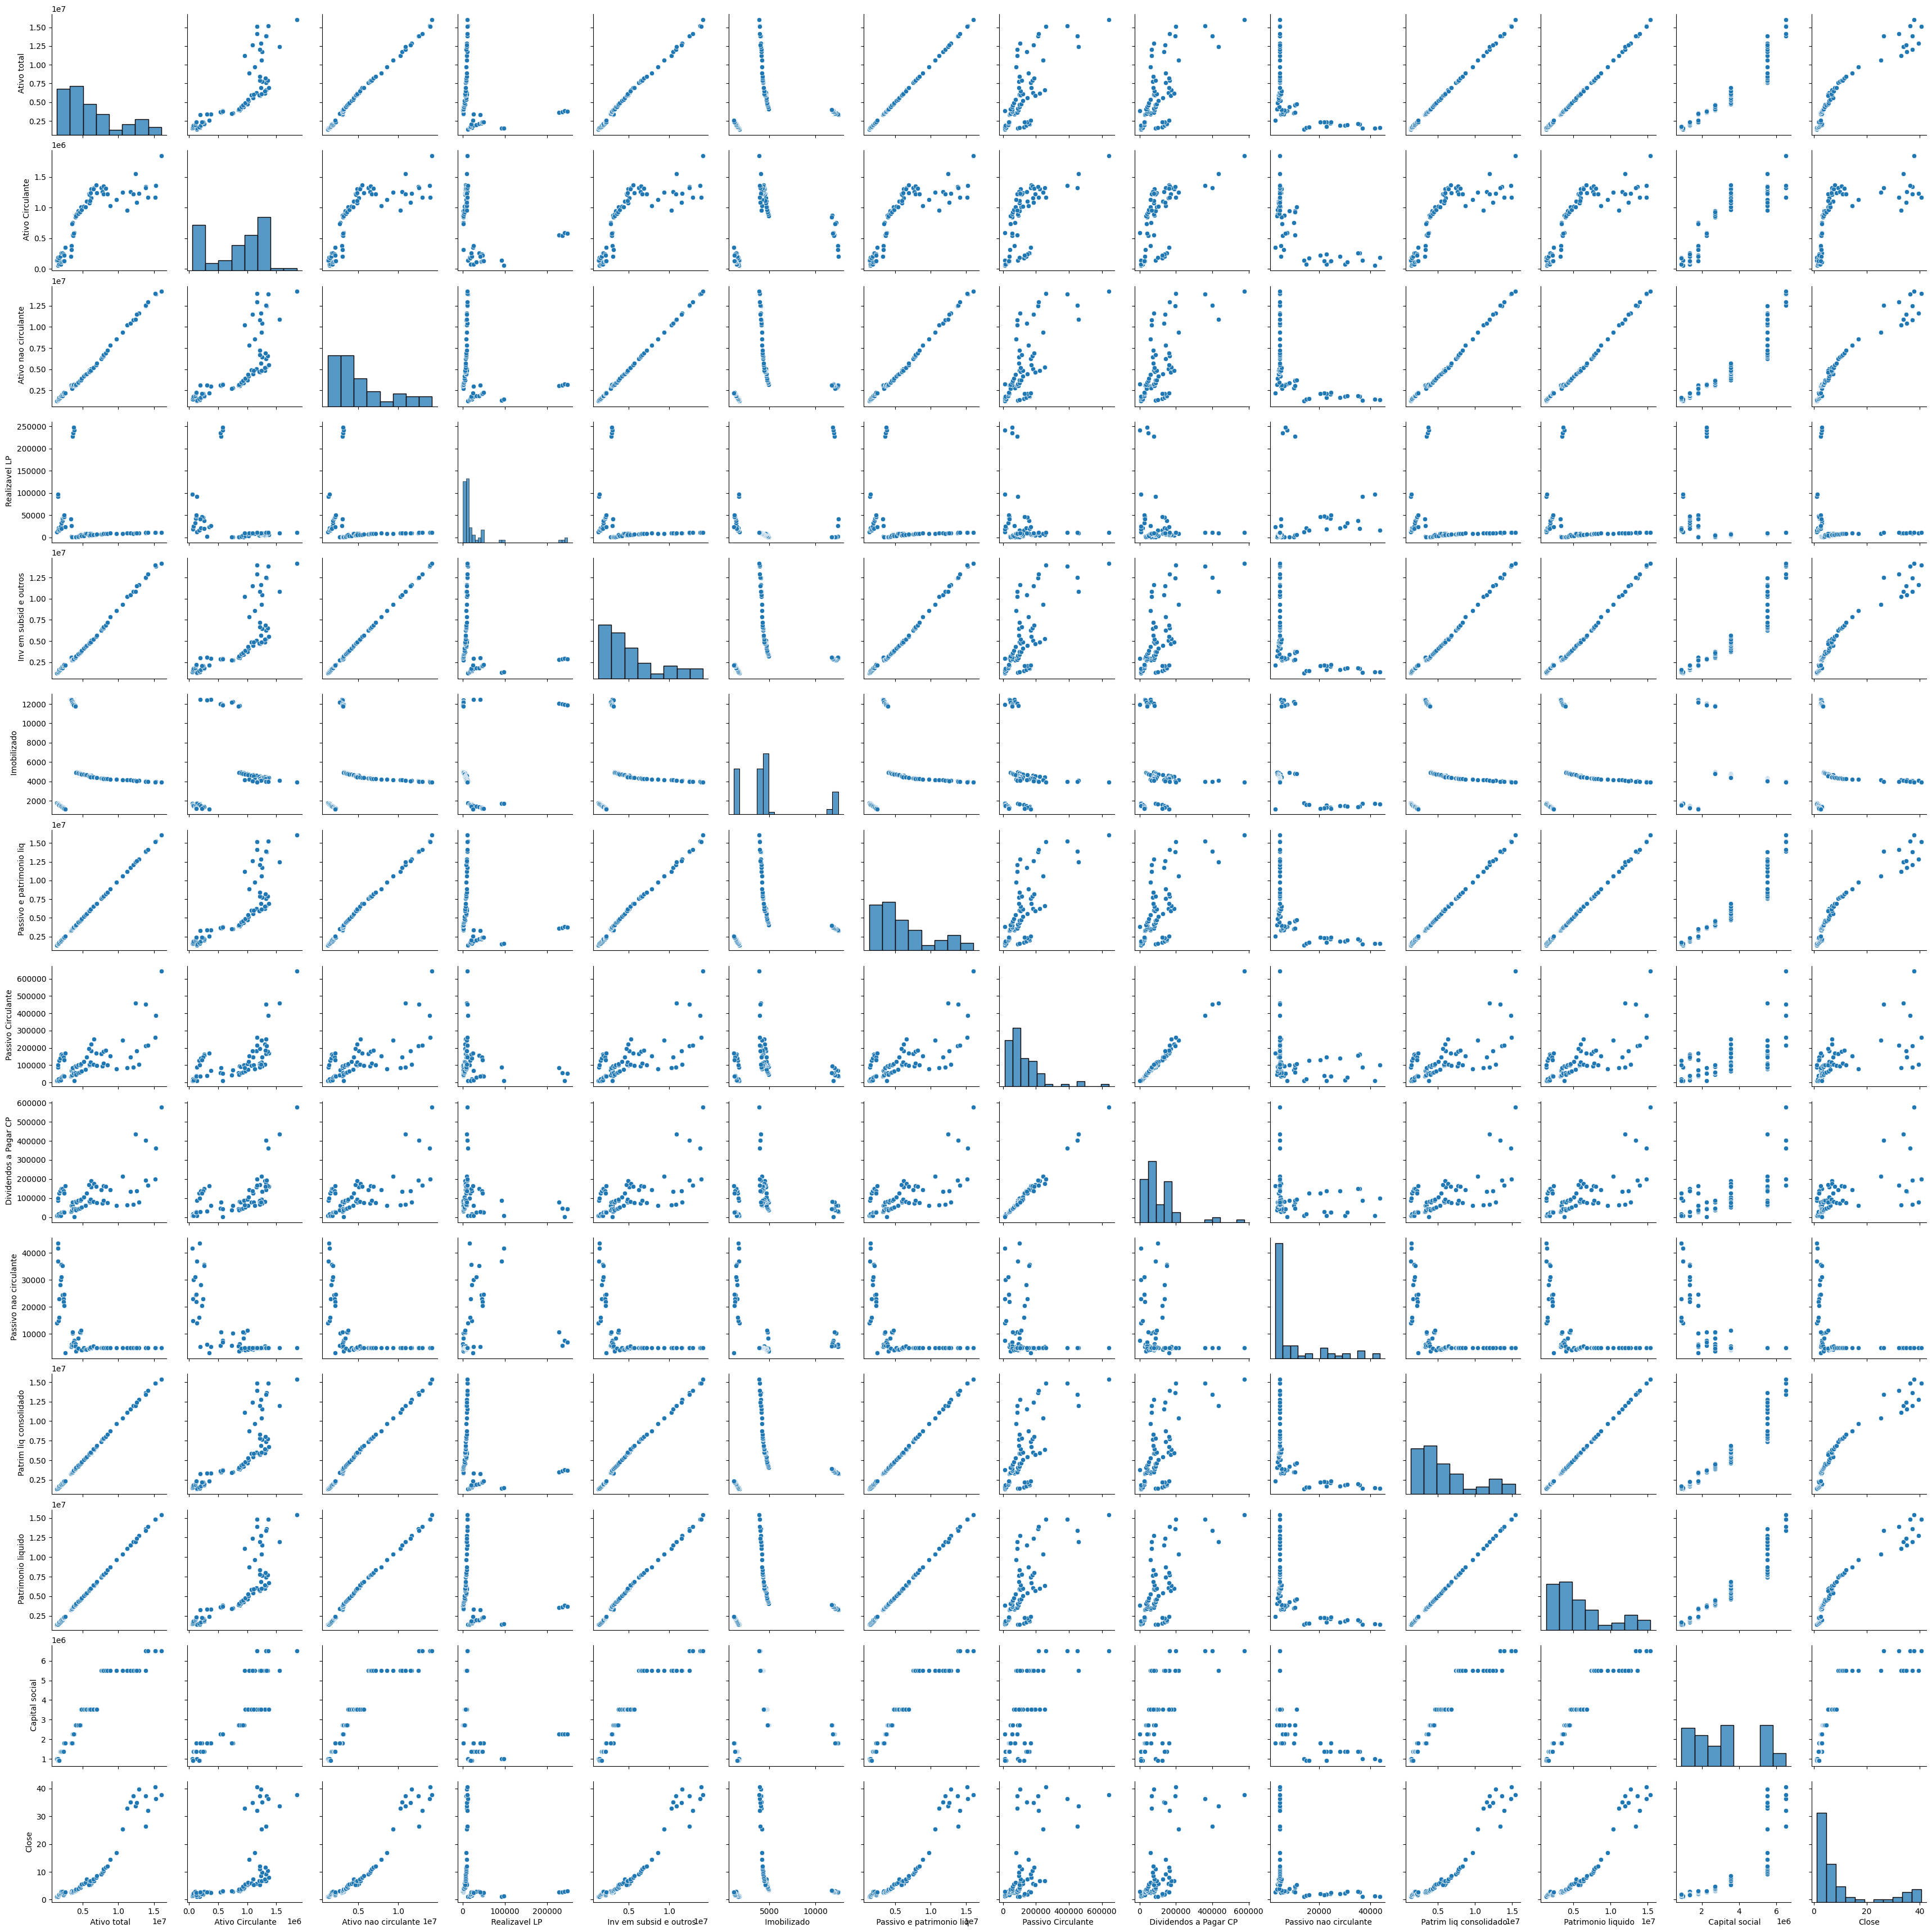

In [428]:
sns.pairplot(df_combinado)

In [429]:
df_combinado.to_csv('df_balanco_patrimonial_WEG.csv', index=True)


In [430]:
df_combinado_teste = df_combinado.join(df_pa_wege["Volume"])
df_combinado_teste.corr()["Close"]

 Ativo total                 0.943691
 Ativo Circulante            0.610099
 Ativo nao circulante        0.959697
 Realizavel LP              -0.223768
 Inv em subsid e outros      0.959492
 Imobilizado                -0.115248
 Passivo e patrimonio liq    0.943691
 Passivo Circulante          0.617064
 Dividendos a Pagar CP       0.586474
 Passivo nao circulante     -0.386718
 Patrim liq consolidado      0.944198
 Patrimonio liquido          0.944198
 Capital social              0.825407
Close                        1.000000
Volume                       0.646134
Name: Close, dtype: float64

In [29]:
df_geral[df_geral['mrgliq'] > 0.1]

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
ABEV3,14.86,15.88,2.75,2.862,0.0513,1.728,-922.79,14.68,-17.15,14.13,10.43,0.1950,0.1856,0.1559,0.1735,0.99,348259000.0,8.499960e+10,0.04,0.1373
ACES3,95.27,8.79,2.28,1.693,0.0000,1.438,6.40,7.20,20.77,6.54,6.54,0.2352,0.1927,0.2690,0.2595,2.05,0.0,3.105800e+09,0.09,0.1334
ACES4,94.73,8.74,2.27,1.683,0.0000,1.430,6.37,7.16,20.65,6.50,6.50,0.2352,0.1927,0.2690,0.2595,2.05,0.0,3.105800e+09,0.09,0.1334
AESB3,11.88,56.50,1.62,2.420,0.0074,0.357,2.21,9.56,-0.76,20.13,11.78,0.2531,0.1048,0.0474,0.0288,2.80,20199900.0,4.401580e+09,2.69,0.1226
AESL3,10081.90,10.65,2.86,1.087,0.0000,0.699,145.65,4.95,-1.21,7.73,6.52,0.2195,0.1021,0.1542,0.2686,1.03,0.0,3.967980e+09,1.72,0.2743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VULC4,18.00,8.86,2.47,1.683,0.0000,1.630,3.86,10.27,5.27,10.50,8.74,0.1639,0.1899,0.1988,0.2785,2.87,0.0,1.793630e+09,0.26,0.2123
WEGE3,39.92,33.34,10.89,5.276,0.0146,5.758,17.61,24.53,24.05,24.14,22.19,0.2151,0.1614,0.3180,0.3267,1.89,340275000.0,1.538500e+10,0.18,0.2759
WEGE4,16.10,13.44,4.39,2.128,0.0000,2.322,7.10,9.89,9.70,9.50,8.73,0.2151,0.1614,0.3180,0.3267,1.89,0.0,1.538500e+10,0.18,0.2759


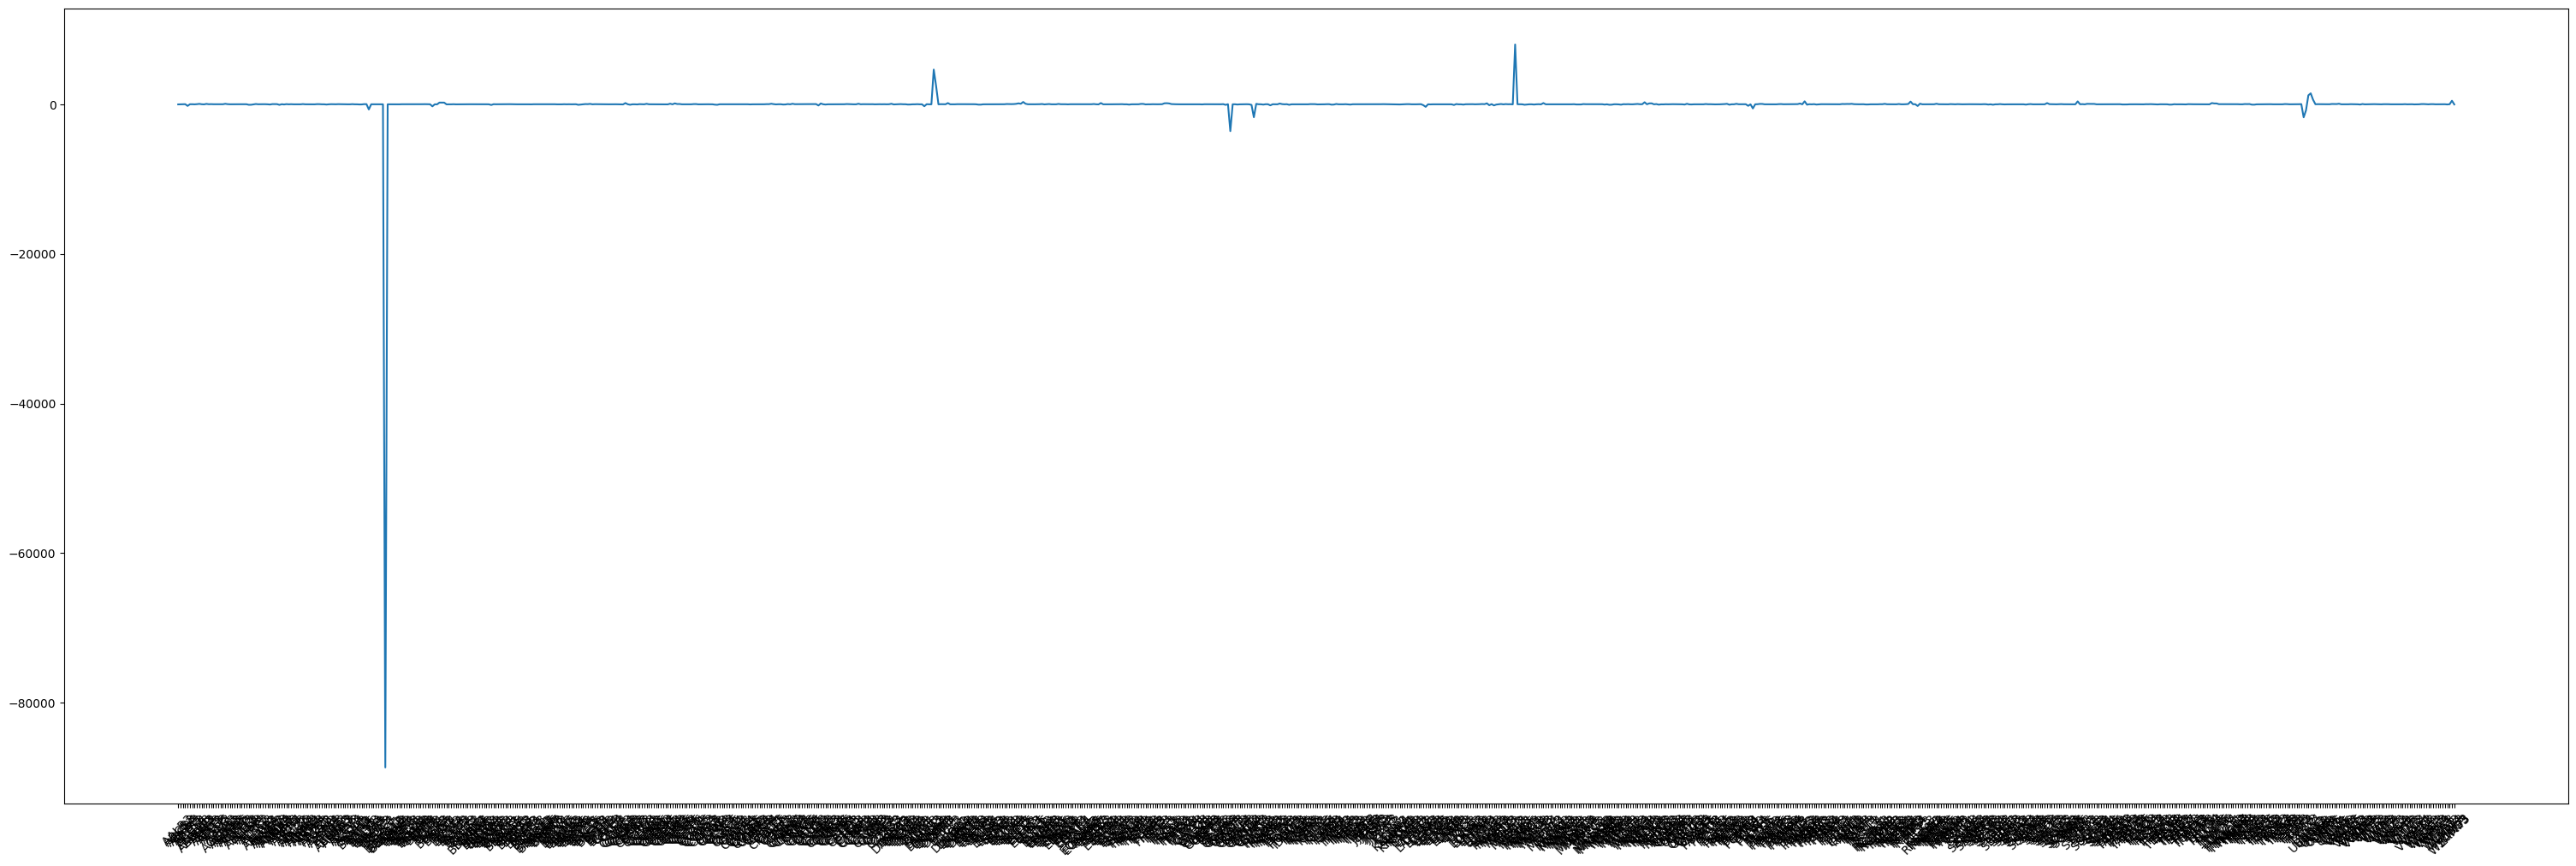

In [431]:
df_geral
par_pl_mean = df_geral["pl"].mean()
par_pl_mean
fig, ax = plt.subplots(figsize=(30,10))
ax = plt.xticks(rotation=45)
ax = plt.tight_layout()
ax = plt.plot(df_geral.index, df_geral["pl"])

In [31]:
df_geral[df_geral["roe"] > 1]

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AHEB3,22.09,2.87,26.05,0.457,0.0000,0.522,5.06,1.92,-0.91,1.51,1.41,0.2383,0.1594,0.3524,9.0867,1.34,315.67,7.244000e+06,0.65,0.4356
AHEB5,16.50,2.14,19.46,0.341,0.0000,0.390,3.78,1.43,-0.68,1.02,0.96,0.2383,0.1594,0.3524,9.0867,1.34,157.26,7.244000e+06,0.65,0.4356
AHEB6,18.50,2.40,21.82,0.383,0.0000,0.437,4.24,1.61,-0.77,1.20,1.12,0.2383,0.1594,0.3524,9.0867,1.34,88.12,7.244000e+06,0.65,0.4356
ARTE3,7.70,-0.04,-0.04,0.000,0.0000,0.103,0.00,-0.52,0.00,-15.85,-15.85,0.0000,0.0000,0.0000,1.0290,0.00,0.00,-3.357000e+07,0.00,-0.6435
ARTE4,6.81,-0.03,-0.03,0.000,0.0000,0.091,0.00,-0.46,0.00,-15.79,-15.79,0.0000,0.0000,0.0000,1.0290,0.00,0.00,-3.357000e+07,0.00,-0.6435
ATMP3,2.23,-0.14,-0.17,0.112,0.0000,0.036,-0.07,-0.31,-0.04,-1.75,-3.70,-0.3621,-0.8045,-0.1520,1.2186,0.30,770680.00,-3.521130e+08,-1.09,-0.1432
BEEF3,10.09,9.32,11.49,0.203,0.0571,0.303,1.22,2.71,-0.84,6.12,5.10,0.0750,0.0217,0.2019,1.2329,1.73,99572600.00,5.334670e+08,26.39,0.1848
CORR3,12.00,0.04,0.05,0.832,0.0000,0.017,0.03,-0.08,0.21,3.66,3.71,-10.0389,21.7575,-0.7999,1.3601,4.58,0.00,5.343000e+06,0.00,-0.2427
CORR4,82.00,0.26,0.36,5.684,0.0000,0.113,0.19,-0.57,1.42,3.18,3.22,-10.0389,21.7575,-0.7999,1.3601,4.58,0.00,5.343000e+06,0.00,-0.2427


In [434]:
df_geral["liqc"].mean()

1.7962293388429753

In [436]:
df_filtrado = df_geral[(df_geral["pvp"] <= 1)&(df_geral["pvp"] >= 0)&(df_geral["pl"] > 0)&(df_geral["liqc"] > 1.7962293388429753)] 
df_filtrado

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
ALSO3,24.73,4.62,0.96,9.686,0.0210,0.494,9.28,20.05,-1.48,17.06,11.60,0.4831,2.1509,0.0267,0.2082,1.93,1.216530e+08,1.477070e+10,0.00,0.3285
AMER3,1.12,23.57,0.07,0.036,0.0000,0.021,0.08,0.84,-0.10,10.94,4.17,0.0431,0.0015,0.0361,0.0029,2.24,1.845100e+07,1.470560e+10,1.41,0.4703
AURE3,14.12,4.56,0.95,2.403,0.0001,0.428,2.91,16.93,-1.56,17.46,10.29,0.1419,0.5270,0.0321,0.2094,2.12,4.098330e+07,1.478600e+10,0.45,0.4752
BALM3,9.50,20.89,0.67,0.551,0.0227,0.374,0.84,3.97,1.41,2.99,2.53,0.1389,0.0259,0.1225,0.0322,2.71,5.496050e+03,1.382270e+08,0.18,0.0472
BALM4,9.50,20.89,0.67,0.551,0.0227,0.374,0.84,3.97,1.41,2.99,2.53,0.1389,0.0259,0.1225,0.0322,2.71,2.526670e+03,1.382270e+08,0.18,0.0472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USIM3,7.34,34.94,0.39,0.304,0.0407,0.231,0.65,4.35,1.67,4.80,3.29,0.0700,0.0199,0.0654,0.0111,3.97,2.627960e+06,2.370980e+10,0.25,0.2639
USIM5,7.11,33.85,0.38,0.295,0.0462,0.224,0.63,4.21,1.61,4.66,3.20,0.0700,0.0199,0.0654,0.0111,3.97,8.934100e+07,2.370980e+10,0.25,0.2639
USIM6,16.35,77.84,0.86,0.678,0.0201,0.516,1.44,9.68,3.71,10.14,6.95,0.0700,0.0199,0.0654,0.0111,3.97,1.275140e+03,2.370980e+10,0.25,0.2639


In [437]:
df_filtrado = df_filtrado.drop(index=["BALM3","CEBR3","CEBR5","CGRA3","CORR3","ELET3","ETER3","GOAU3","MRSL3","PATI3","RPAD3","RPAD5","SUZB5","USIM3","USIM5"])


In [471]:
df_filtrado.index
df_nomes = df_filtrado.index + ".SA"
nomes = list(df_nomes)
indices = ["TRPN3.SA","FRAS4.SA","VINE5.SA","DSUL3.SA","MARI3.SA","BELG4.SA","MRSL4.SA","SUZA4.SA","CYRE4.SA","VINE3.SA","ETER4.SA","BELG3.SA","HGTX4.SA","SUZB6.SA"]
indices_dos_valores = [indice for indice, valor in enumerate(nomes) if valor in indices]
df_nomes = df_nomes.drop(indices)


In [472]:
nomes = list(df_nomes)
df_pa_wege

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-08-02,1.109467,1.109467,1.109467,1.109467,0.804700,0
2005-08-03,1.109467,1.109467,1.109467,1.109467,0.804700,0
2005-08-04,1.109467,1.109467,1.109467,1.109467,0.804700,0
2005-08-05,1.109467,1.109467,1.109467,1.109467,0.804700,0
2005-08-08,1.109467,1.109467,1.109467,1.109467,0.804700,0
...,...,...,...,...,...,...
2023-07-27,40.480000,41.040001,40.070000,40.349998,40.349998,8479800
2023-07-28,40.900002,41.430000,40.189999,40.320000,40.320000,5882900
2023-07-31,40.290001,40.290001,39.810001,39.919998,39.919998,7141800


In [457]:
nomes

[0]

In [530]:
df_closes = yf.download(nomes, period="18y")["Adj Close"]

[*********************100%***********************]  32 of 32 completed


In [478]:
df_closes.columns

Index(['ALSO3.SA', 'AMER3.SA', 'AURE3.SA', 'BALM4.SA', 'BMKS3.SA', 'BRIT3.SA',
       'CBAV3.SA', 'CGRA4.SA', 'CORR4.SA', 'DOHL4.SA', 'ELET6.SA', 'EVEN3.SA',
       'FIEI3.SA', 'GGBR3.SA', 'GOAU4.SA', 'HBOR3.SA', 'JHSF3.SA', 'LVTC3.SA',
       'MDNE3.SA', 'MELK3.SA', 'MTRE3.SA', 'NGRD3.SA', 'PATI4.SA', 'PEAB3.SA',
       'POSI3.SA', 'RPAD6.SA', 'TCSA3.SA', 'TECN3.SA', 'TKNO4.SA', 'TRIS3.SA',
       'TRPL4.SA', 'USIM6.SA'],
      dtype='object')

In [531]:
for colunas in df_closes.columns: 
    if df_closes[f"{colunas}"].isnull().any():
        df_closes = df_closes.drop(columns=colunas)


df_closes = df_closes.drop(columns="TRPL4.SA")


In [476]:
df_closes.columns

Index(['AMER3.SA', 'CGRA4.SA', 'DOHL4.SA', 'GGBR3.SA', 'GOAU4.SA'], dtype='object')

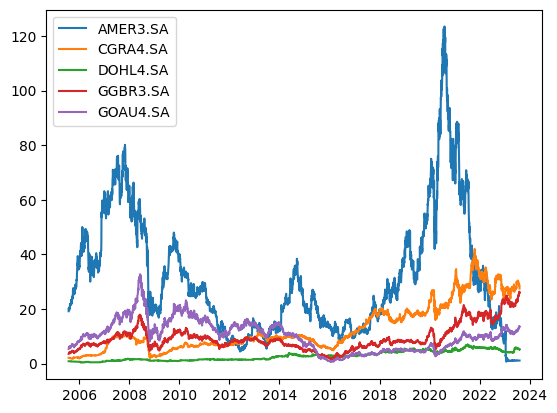

In [532]:
fig, ax = plt.subplots()
for coluna in df_closes.columns:
    # Plotar os dados da coluna atual no subplot
    ax.plot(df_closes.index, df_closes[coluna], label=coluna)

# Adicionar legenda ao subplot
ax.legend()

# Exibir o gráfico
plt.show()


In [481]:
import datetime as dt
import scipy.optimize as solver

In [482]:
weight = [1/5, 1/5, 1/5, 1/5, 1/5]

Date
2005-08-03    0.015729
2005-08-04    0.015400
2005-08-05    0.007360
2005-08-08    0.017798
2005-08-09    0.003651
                ...   
2023-07-27   -0.012036
2023-07-28    0.004846
2023-07-31    0.000186
2023-08-01    0.002916
2023-08-02   -0.010741
Name: portfolio, Length: 4475, dtype: float64


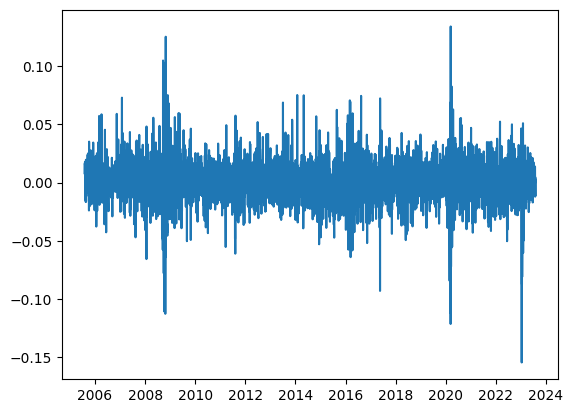

<Figure size 640x480 with 0 Axes>

In [483]:
retornos = df_closes.pct_change().dropna()
retorno_carteira = pd.Series((retornos*weight).sum(axis=1), name='portfolio')
print(retorno_carteira)
plt.plot(retorno_carteira)
plt.show()
plt.clf()

In [484]:
retorno_acumulado = (1 + retorno_carteira).cumprod()
retorno_acumulado.iloc[0] = 1
print(retorno_acumulado)

Date
2005-08-03    1.000000
2005-08-04    1.031372
2005-08-05    1.038962
2005-08-08    1.057454
2005-08-09    1.061314
                ...   
2023-07-27    9.856223
2023-07-28    9.903985
2023-07-31    9.905826
2023-08-01    9.934714
2023-08-02    9.828000
Name: portfolio, Length: 4475, dtype: float64


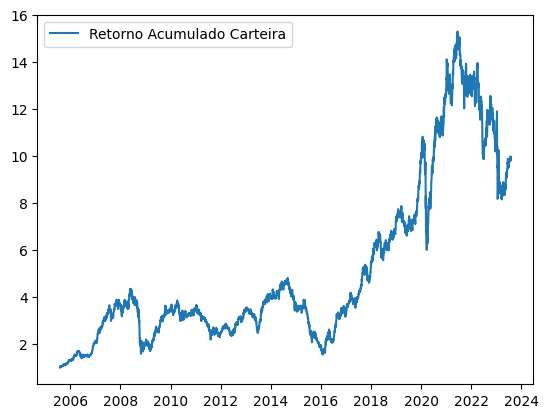

In [485]:
plt.plot(retorno_acumulado.index, retorno_acumulado, label= "Retorno Acumulado Carteira")
plt.legend()

In [51]:
df_closes.to_csv('df_closes_acoes_definitivas.csv', index=False)


In [486]:
#numero de ativos
j = len(df_closes.columns)
lista = df_closes.columns

df_pct = df_closes.pct_change()

mi = df_pct.mean()*252
sigma = df_pct.cov()*252

In [490]:
vet_ret = []
vet_vol = []
vet_pesos = []
for i in range(50000):
    w = np.random.random(j)
    w = w/np.sum(w)
    retorno = np.sum(w * mi)
    risco = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    vet_pesos.append(w)
    vet_ret.append(retorno)
    vet_vol.append(risco)

vet_pesos = pd.array(vet_pesos)
vet_vol = pd.array(vet_vol)
vet_ret = pd.array(vet_ret)
data = {'pesos': vet_pesos, 'retorno': vet_ret, 'volatilidade': vet_vol}

df_vet = pd.DataFrame(data)

df_vet

,pesos,retorno,volatilidade
0,"[0.34694977007049765, 0.20303859165515897, 0.0...",0.148911,0.365414
1,"[0.391862127343494, 0.09958478300420609, 0.136...",0.151401,0.354545
2,"[0.43496490085213163, 0.07288539497785514, 0.2...",0.146397,0.353922
3,"[0.17956794068969198, 0.26662561059921663, 0.0...",0.175187,0.315162
4,"[0.1871127575225849, 0.21332538327538578, 0.19...",0.172607,0.285383
...,...,...,...
49995,"[0.2544680721140433, 0.3145513527907428, 0.355...",0.17088,0.277834
49996,"[0.038948902107635436, 0.1372456929583578, 0.3...",0.183172,0.283008
49997,"[0.1841671905351208, 0.11193280989766605, 0.24...",0.166326,0.298309
49998,"[0.042274787706760165, 0.36068596919304935, 0....",0.196057,0.258811


In [491]:
def f_obj(peso):
    return np.sqrt(np.dot(peso.T,np.dot(sigma,peso)))

x0 = np.array([1.0 / (len(lista)) for x in range(len(lista))])

bounds = tuple((0,1) for x in range(len(lista)))

faixa_ret = np.arange(0.12, 0.22, .0025)

risk = []


In [492]:
for i in faixa_ret:
    constraints = [{'type': 'eq', 'fun' : lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun' : lambda x: np.sum(x*mi) - i}]
    outcome = solver.minimize(f_obj, x0, constraints=constraints, bounds=bounds, method='SLSQP')
    risk.append(outcome.fun)

print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('pesos otimos (w) =', outcome['x'].round(3))
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
print(outcome)
w = outcome['x'].round(3)
retorno = np.sum(w * mi)
risco = np.sqrt(np.dot(w.T, np.dot(sigma, w)))



++++++++++++++++++++++++++++++++++++++++++++++++++++++
pesos otimos (w) = [0.    0.933 0.    0.067 0.   ]
++++++++++++++++++++++++++++++++++++++++++++++++++++++

     fun: 0.3653295368197936
     jac: array([0.07954926, 0.38406284, 0.00675208, 0.10503081, 0.11540347])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.66533454e-16, 9.32863260e-01, 0.00000000e+00, 6.71367398e-02,
       5.55111512e-17])


Text(0, 0.5, 'Retorno')

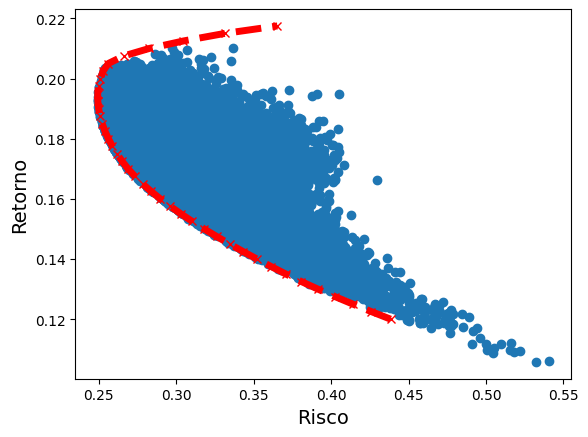

In [493]:
plt.plot(risk, faixa_ret, 'r--x', linewidth=5)
plt.scatter(vet_vol,vet_ret)
plt.xlabel("Risco", fontsize = 14)
plt.ylabel("Retorno", fontsize = 14)

In [57]:
print(retorno, risco)

0.2174995281230288 0.3493868574005054


In [494]:
#Ponto òtimo - Minima Volatilidade

def estatistica_port(peso):
    peso = np.array(peso)
    ret_ot = np.sum(peso*mi)
    risco_ot = np.sqrt(np.dot(peso.T,np.dot(sigma, peso)))
    return np.array([ret_ot,risco_ot])

for i in faixa_ret:
    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
                   #{'type': 'eq', 'fun': lambda x: np.sum(x * mi) - i}]
    outcome = solver.minimize(f_obj, x0, constraints=constraints, bounds=bounds, method='SLSQP')
    risk.append(outcome.fun)

ret_ot, risco_ot = estatistica_port(outcome['x'])
print('Retorno otimo esperado = ', str((ret_ot*100).round(3)) + '%')
print('volatilidade otima esperada  = ', str((risco_ot*100).round(3)) + '%')
print('Sharp ratio otimizado = ', str(((ret_ot/risco_ot)*100).round(3)) + '%')



Retorno otimo esperado =  19.421%
volatilidade otima esperada  =  24.93%
Sharp ratio otimizado =  77.902%


In [495]:
w

array([0.   , 0.933, 0.   , 0.067, 0.   ])

Date
2005-08-03    0.001658
2005-08-04    0.001295
2005-08-05    0.001873
2005-08-08    0.003120
2005-08-09    0.000885
                ...   
2023-07-27   -0.016582
2023-07-28    0.004063
2023-07-31   -0.002941
2023-08-01   -0.016717
2023-08-02   -0.017171
Name: portfolio2, Length: 4475, dtype: float64


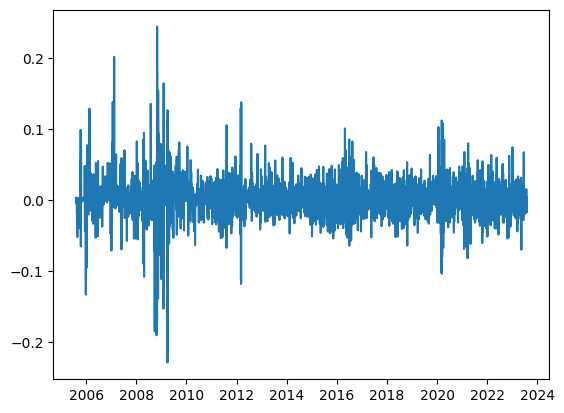

<Figure size 640x480 with 0 Axes>

In [496]:
retorno_carteira_otimizada = pd.Series((retornos*w).sum(axis=1), name='portfolio2')
print(retorno_carteira_otimizada)
plt.plot(retorno_carteira_otimizada)
plt.show()
plt.clf()


In [497]:
retorno_acumulado_otimizado = (1 + retorno_carteira_otimizada).cumprod()
retorno_acumulado_otimizado.iloc[0] = 1
print(retorno_acumulado)

Date
2005-08-03    1.000000
2005-08-04    1.031372
2005-08-05    1.038962
2005-08-08    1.057454
2005-08-09    1.061314
                ...   
2023-07-27    9.856223
2023-07-28    9.903985
2023-07-31    9.905826
2023-08-01    9.934714
2023-08-02    9.828000
Name: portfolio, Length: 4475, dtype: float64


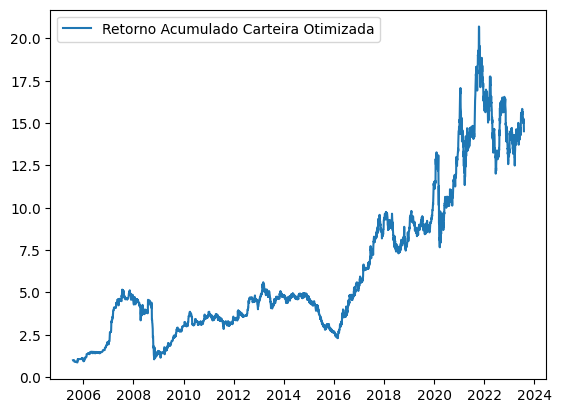

In [498]:
plt.plot(retorno_acumulado_otimizado.index, retorno_acumulado_otimizado, label= "Retorno Acumulado Carteira Otimizada")
plt.legend()

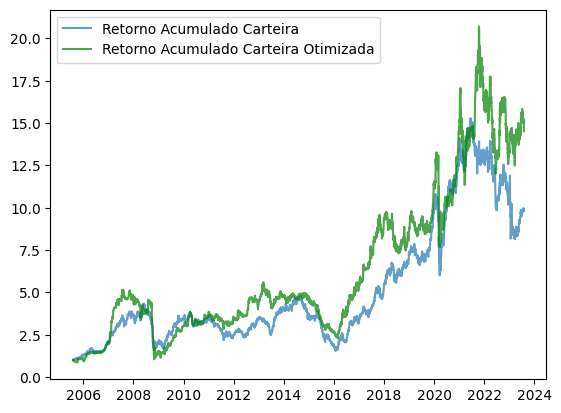

In [499]:
plt.plot(retorno_acumulado.index, retorno_acumulado, label= "Retorno Acumulado Carteira", alpha=0.7)
plt.plot(retorno_acumulado_otimizado.index, retorno_acumulado_otimizado, label= "Retorno Acumulado Carteira Otimizada", color="green",alpha=0.7)

plt.legend()

In [500]:
ibov = yf.download("^BVSP", period="18y")["Adj Close"]
ibov_pct = ibov.pct_change()
ibov_retorno_acumulado = (1 + ibov_pct).cumprod()
ibov_retorno_acumulado.iloc[0] = 1
ibov_retorno_acumulado

[*********************100%***********************]  1 of 1 completed


Date
2005-08-02    1.000000
2005-08-03    0.997200
2005-08-04    0.988092
2005-08-05    0.989884
2005-08-08    0.997088
                ...   
2023-07-27    4.479077
2023-07-28    4.486431
2023-07-31    4.551980
2023-08-01    4.526037
2023-08-02    4.511516
Name: Adj Close, Length: 4453, dtype: float64

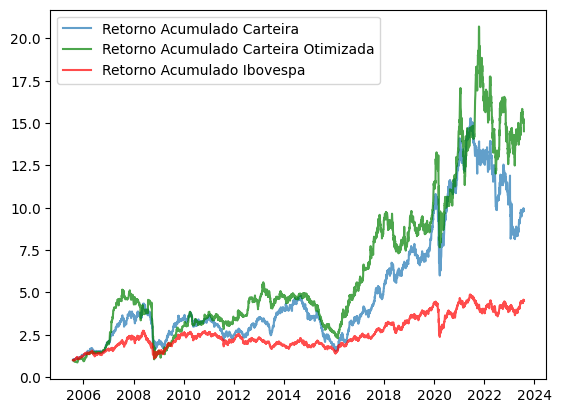

In [501]:
plt.plot(retorno_acumulado.index, retorno_acumulado, label= "Retorno Acumulado Carteira", alpha=0.7)
plt.plot(retorno_acumulado_otimizado.index, retorno_acumulado_otimizado, label= "Retorno Acumulado Carteira Otimizada", color="green",alpha=0.7)
plt.plot(ibov_retorno_acumulado.index, ibov_retorno_acumulado, label="Retorno Acumulado Ibovespa", color="red", alpha=0.7)
plt.legend()

In [502]:
import talib as tl


In [503]:
k, d = tl.STOCHRSI(ibov, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
k = pd.DataFrame(k)
d = pd.DataFrame(d)
ibov = pd.DataFrame(ibov)

In [504]:
ibov = ibov.join(k)

In [505]:
ibov

,Adj Close,0
Date,,
2005-08-02,26789.0,NaN
2005-08-03,26714.0,NaN
2005-08-04,26470.0,NaN
2005-08-05,26518.0,NaN
2005-08-08,26711.0,NaN
...,...,...
2023-07-27,119990.0,0.000000
2023-07-28,120187.0,5.388140
2023-07-31,121943.0,50.208546


In [506]:
ibov["d"] = d
ibov.columns = ["Adj Close","k","d"]


In [507]:
ibov.dropna()

,Adj Close,k,d
Date,,,
2005-08-30,27604.0,100.000000,80.463373
2005-08-31,28045.0,100.000000,96.848201
2005-09-01,27962.0,87.290442,95.763481
2005-09-02,28319.0,100.000000,95.763481
2005-09-05,28522.0,100.000000,95.763481
...,...,...,...
2023-07-27,119990.0,0.000000,66.666667
2023-07-28,120187.0,5.388140,35.129380
2023-07-31,121943.0,50.208546,18.532229


In [508]:
# number_of_orders = 0
# sinal_rsi_est = list([])
# for i in range(len(ibov)):
#     if (ibov["d"].iloc[i-1] <= ibov["k"].iloc[i])&(ibov["d"].iloc[i] > ibov["k"].iloc[i])&(number_of_orders != 1):#&(ibov["k"].iloc[i] <= 20)&(ibov["d"].iloc[i] <= 20):
#         sinal_rsi_est.append(1)
#         number_of_orders = 1
#         print(1)
#     elif (ibov["d"].iloc[i-1] >= ibov["k"].iloc[i])&(ibov["d"].iloc[i] < ibov["k"].iloc[i])&(number_of_orders != 0):#&(ibov["k"].iloc[i] >= 80)&(ibov["d"].iloc[i] >= 80):
#         sinal_rsi_est.append(2)
#         number_of_orders = 0
#         print(2)
#     else:
#         sinal_rsi_est.append(0)  
#         print(0)  

# sinal_rsi_est = pd.DataFrame(sinal_rsi_est)
# sinal_rsi_est.value_counts()


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0    4236
1     109
2     108
dtype: int64

In [648]:
number_of_orders = 0
sinal_rsi_est = list([])
for i in range(len(ibov)):
    if (number_of_orders != 1)&(ibov["k"].iloc[i] < 40)&(ibov["d"].iloc[i] < 40):
        sinal_rsi_est.append(1)
        number_of_orders = 1
        print(1)
    elif (number_of_orders != 0)&(ibov["k"].iloc[i] > 60)&(ibov["d"].iloc[i] > 60):
        sinal_rsi_est.append(2)
        number_of_orders = 0
        print(2)
    else:
        sinal_rsi_est.append(0)  
        print(0)  

sinal_rsi_est = pd.DataFrame(sinal_rsi_est)
sinal_rsi_est.value_counts()


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
0
0
0
0
0
0
1
0
0
2
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
2
0
1
0
0
0
2
0
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
2
0
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
1
0
0
2
0
0
0
0
1
0
0
0
0
2
0
0
0
0
1
0
0
0
2
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0
2
0
0
0
1
0
2
0
0
0
0
1
0
2
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
1
0
0
2
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
2
0
0
0
0
1
0
0
0
2
0
0
0
0
0
1
0
0
0
2
0
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
2
0
0
1
0
2


0    3814
1     320
2     319
dtype: int64

In [649]:
sinal_rsi_est = pd.DataFrame(sinal_rsi_est)
sinal_rsi_est

,0
0,0
1,0
2,0
3,0
4,0
...,...
4448,0
4449,1
4450,0
4451,0


In [650]:
ibov = ibov.drop(columns="sinal RSI")


In [651]:
sinal_rsi_est.columns = ["sinal rsi"]
sinal_rsi_est.index = ibov.index

In [639]:
len(ibov)

4453

In [652]:
ibov["sinal RSI"] = sinal_rsi_est["sinal rsi"]
ibov

,Adj Close,k,d,data,sinal RSI
Date,,,,,
2005-08-02,26789.0,NaN,NaN,2005-08-02,0
2005-08-03,26714.0,NaN,NaN,2005-08-03,0
2005-08-04,26470.0,NaN,NaN,2005-08-04,0
2005-08-05,26518.0,NaN,NaN,2005-08-05,0
2005-08-08,26711.0,NaN,NaN,2005-08-08,0
...,...,...,...,...,...
2023-07-27,119990.0,0.000000,66.666667,2023-07-27,0
2023-07-28,120187.0,5.388140,35.129380,2023-07-28,1
2023-07-31,121943.0,50.208546,18.532229,2023-07-31,0


In [653]:
ibov.dropna()

,Adj Close,k,d,data,sinal RSI
Date,,,,,
2005-08-30,27604.0,100.000000,80.463373,2005-08-30,0
2005-08-31,28045.0,100.000000,96.848201,2005-08-31,0
2005-09-01,27962.0,87.290442,95.763481,2005-09-01,0
2005-09-02,28319.0,100.000000,95.763481,2005-09-02,0
2005-09-05,28522.0,100.000000,95.763481,2005-09-05,0
...,...,...,...,...,...
2023-07-27,119990.0,0.000000,66.666667,2023-07-27,0
2023-07-28,120187.0,5.388140,35.129380,2023-07-28,1
2023-07-31,121943.0,50.208546,18.532229,2023-07-31,0


In [515]:
ibov["data"] = ibov.index

In [654]:
compra_indices = ibov[ibov['sinal RSI'] == 1].index
compra_indices

DatetimeIndex(['2005-09-14', '2005-09-28', '2005-10-05', '2005-11-09',
               '2005-12-08', '2005-12-16', '2005-12-27', '2006-01-18',
               '2006-02-03', '2006-03-07',
               ...
               '2023-01-03', '2023-01-30', '2023-02-23', '2023-03-13',
               '2023-04-04', '2023-04-18', '2023-05-24', '2023-06-22',
               '2023-07-10', '2023-07-28'],
              dtype='datetime64[ns]', name='Date', length=320, freq=None)

In [656]:
ibov[ibov['sinal RSI'] == 2].index

DatetimeIndex(['2005-09-16', '2005-10-03', '2005-10-25', '2005-11-18',
               '2005-12-14', '2005-12-22', '2006-01-02', '2006-01-24',
               '2006-02-16', '2006-03-14',
               ...
               '2022-12-20', '2023-01-06', '2023-02-16', '2023-03-07',
               '2023-03-28', '2023-04-11', '2023-05-08', '2023-06-05',
               '2023-07-03', '2023-07-24'],
              dtype='datetime64[ns]', name='Date', length=319, freq=None)

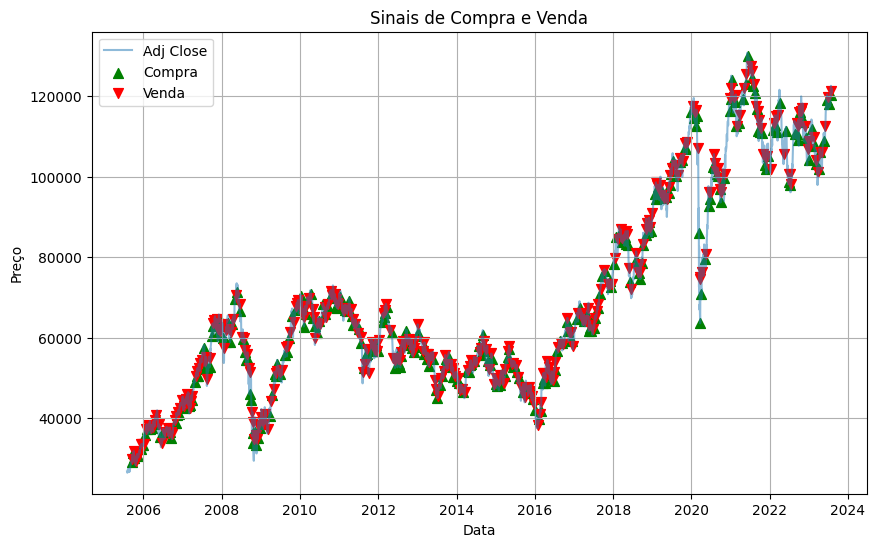

In [657]:
plt.figure(figsize=(10, 6))
plt.plot(ibov["data"], ibov['Adj Close'], label='Adj Close', alpha=0.5)

# Adicionar pontos de compra e venda ao gráfico
compra_indices = ibov[ibov['sinal RSI'] == 1].index
venda_indices = ibov[ibov['sinal RSI'] == 2].index

plt.scatter(ibov["data"].loc[compra_indices], ibov['Adj Close'].loc[compra_indices], color='green', label='Compra', marker='^', s=50)
plt.scatter(ibov["data"].loc[venda_indices], ibov['Adj Close'].loc[venda_indices], color='red', label='Venda', marker='v', s=50)

# Adicionar legenda e rótulos dos eixos
plt.legend()
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Sinais de Compra e Venda')
plt.grid()

# Exibir o gráfico
plt.show()





In [681]:
ibov[ibov["sinal RSI"] == 1]["Adj Close"]
ibov[ibov["sinal RSI"] == 2]["Adj Close"]
compra = np.array(ibov[ibov["sinal RSI"] == 1]["Adj Close"])
venda = np.array(ibov[ibov["sinal RSI"] == 2]["Adj Close"])


In [683]:
compra = compra[:-1]

In [684]:
len(compra)

319

In [685]:
retorno_estrategia_rsi = venda/compra
retorno_estrategia_rsi_acumulado = retorno_estrategia_rsi.cumprod()
len(retorno_estrategia_rsi_acumulado)

319

In [686]:
ind = ibov[ibov["sinal RSI"] == 2]["Adj Close"].index
retorno_estrategia_rsi_acumulado = pd.DataFrame(retorno_estrategia_rsi_acumulado)
retorno_estrategia_rsi_acumulado.index = ind

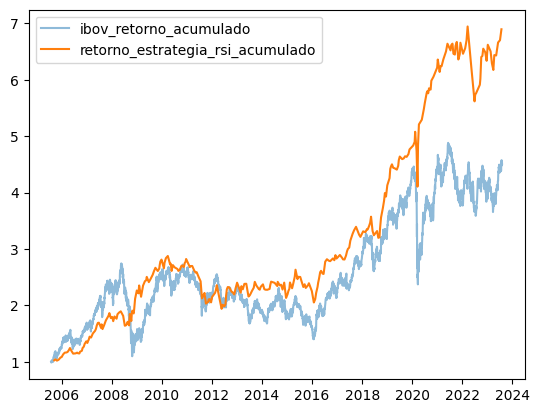

In [687]:
plt.plot(ibov.index, ibov_retorno_acumulado, alpha=0.5, label="ibov_retorno_acumulado")
plt.plot(retorno_estrategia_rsi_acumulado.index,retorno_estrategia_rsi_acumulado, label="retorno_estrategia_rsi_acumulado")
plt.legend()

In [534]:

for colunas in df_closes.columns:
    k, d = tl.STOCHRSI(df_closes[f"{colunas}"], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    k= pd.DataFrame(k)
    k.columns = ["k"]
    k.index = df_closes.index
    d = pd.DataFrame(d)
    d.columns = ["d"]
    d.index = df_closes.index
    df_closes = pd.DataFrame(df_closes)

    df_closes = df_closes.join(k)
    df_closes = df_closes.join(d)
    novos_nomes = {
    'k': f'k{colunas}',
    'd': f'd{colunas}'
    }
    df_closes.rename(columns=novos_nomes, inplace=True)










In [294]:
#df_closes.drop(df_closes.columns[-1], axis=1, inplace=True)


In [535]:
df_closes.dropna()

,AMER3.SA,CGRA4.SA,DOHL4.SA,GGBR3.SA,GOAU4.SA,kAMER3.SA,dAMER3.SA,kCGRA4.SA,dCGRA4.SA,kDOHL4.SA,dDOHL4.SA,kGGBR3.SA,dGGBR3.SA,kGOAU4.SA,dGOAU4.SA
Date,,,,,,,,,,,,,,,
2005-08-30,21.699097,1.901493,0.868557,3.828209,5.855711,0.000000,1.739550e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.017521,12.339174
2005-08-31,21.869284,1.901493,0.868557,3.874290,5.974879,15.785594,2.265737e+01,0.000000,0.000000,0.000000,0.000000,54.997095,18.332365,78.472680,38.496734
2005-09-01,21.792698,1.901493,0.868557,3.897331,5.973223,1.126937,5.637510e+00,0.000000,0.000000,0.000000,0.000000,100.000000,51.665698,98.913819,71.468007
2005-09-02,21.784191,1.899255,0.868557,4.067473,6.247971,0.000000,5.637510e+00,0.000000,0.000000,0.000000,0.000000,100.000000,84.999032,100.000000,92.462167
2005-09-05,21.528908,1.899255,0.868557,4.218119,6.372100,0.000000,3.756455e-01,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,99.637940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,1.130000,28.570000,5.260000,25.690001,13.410000,0.000000,6.666667e+01,17.952972,39.317657,15.670803,15.670803,19.488758,73.162919,45.746455,81.915485
2023-07-28,1.130000,28.700001,5.370000,25.620001,13.430000,0.000000,3.333333e+01,45.173626,54.375533,100.000000,43.780536,0.000000,39.829586,4.598915,50.115123
2023-07-31,1.130000,28.549999,5.120000,26.360001,13.750000,0.000000,-7.579123e-14,20.346022,27.824207,0.000000,38.556934,70.868340,30.119033,71.054978,40.466783


In [616]:
number_of_orders = 0
sinal_rsi_est = list([])
for coluna in df_closes.columns[0:5]:
    sinal_rsi_est = list([])

    for i in range(len(df_closes)):
        if (number_of_orders != 1)&(df_closes[f"k{coluna}"].iloc[i] < 30)&(df_closes[f"d{coluna}"].iloc[i] < 30):
            sinal_rsi_est.append(1)
            number_of_orders = 1
            print(1)
        elif (number_of_orders != 0)&(df_closes[f"k{coluna}"].iloc[i] > 70)&(df_closes[f"d{coluna}"].iloc[i] > 70):
            sinal_rsi_est.append(2)
            number_of_orders = 0
            print(2)
        else:
            sinal_rsi_est.append(0)  
            print(0)  

    
    df_closes[f"sinal{coluna}"] = sinal_rsi_est


1
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0
0
0
2
0
0
1
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
1
0
0
0
0
2
0
0
0
1
0
0
0
2
0
0
0
0
1
0
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
2
0
0
0
0
1
0
0
2
0
0
0
0
1
0
0
2
0
0
0
0
0
1
0
0
2
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
0


In [618]:
df_closes["sinalCGRA4.SA"].tail(30)

Date
2023-06-22    0
2023-06-23    0
2023-06-26    0
2023-06-27    0
2023-06-28    1
2023-06-29    0
2023-06-30    0
2023-07-03    0
2023-07-04    2
2023-07-05    0
2023-07-06    0
2023-07-07    0
2023-07-10    0
2023-07-11    0
2023-07-12    1
2023-07-13    0
2023-07-14    0
2023-07-17    0
2023-07-18    0
2023-07-19    0
2023-07-20    0
2023-07-21    0
2023-07-24    0
2023-07-25    0
2023-07-26    0
2023-07-27    0
2023-07-28    0
2023-07-31    0
2023-08-01    0
2023-08-02    0
Name: sinalCGRA4.SA, dtype: int64

In [525]:
df_closes=df_closes.drop(columns=df_closes.columns[-1:])


In [619]:
df_closes = df_closes.dropna()

In [620]:
df_closes

,AMER3.SA,CGRA4.SA,DOHL4.SA,GGBR3.SA,GOAU4.SA,kAMER3.SA,dAMER3.SA,kCGRA4.SA,dCGRA4.SA,kDOHL4.SA,...,kGGBR3.SA,dGGBR3.SA,kGOAU4.SA,dGOAU4.SA,sinalAMER3.SA,sinalCGRA4.SA,sinalDOHL4.SA,sinalGGBR3.SA,sinalGOAU4.SA,data
Date,,,,,,,,,,,,,,,,,,,,,
2005-08-30,21.699097,1.901493,0.868557,3.828209,5.855711,0.000000,1.739550e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,37.017521,12.339174,1,0,0,0,0,2005-08-30
2005-08-31,21.869284,1.901493,0.868557,3.874290,5.974879,15.785594,2.265737e+01,0.000000,0.000000,0.000000,...,54.997095,18.332365,78.472680,38.496734,0,0,0,0,0,2005-08-31
2005-09-01,21.792698,1.901493,0.868557,3.897331,5.973223,1.126937,5.637510e+00,0.000000,0.000000,0.000000,...,100.000000,51.665698,98.913819,71.468007,0,0,0,0,0,2005-09-01
2005-09-02,21.784191,1.899255,0.868557,4.067473,6.247971,0.000000,5.637510e+00,0.000000,0.000000,0.000000,...,100.000000,84.999032,100.000000,92.462167,0,0,0,2,0,2005-09-02
2005-09-05,21.528908,1.899255,0.868557,4.218119,6.372100,0.000000,3.756455e-01,0.000000,0.000000,0.000000,...,100.000000,100.000000,100.000000,99.637940,0,0,0,0,0,2005-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,1.130000,28.570000,5.260000,25.690001,13.410000,0.000000,6.666667e+01,17.952972,39.317657,15.670803,...,19.488758,73.162919,45.746455,81.915485,0,0,0,0,0,2023-07-27
2023-07-28,1.130000,28.700001,5.370000,25.620001,13.430000,0.000000,3.333333e+01,45.173626,54.375533,100.000000,...,0.000000,39.829586,4.598915,50.115123,0,0,0,0,0,2023-07-28
2023-07-31,1.130000,28.549999,5.120000,26.360001,13.750000,0.000000,-7.579123e-14,20.346022,27.824207,0.000000,...,70.868340,30.119033,71.054978,40.466783,1,0,0,0,0,2023-07-31


In [539]:
df_closes["data"] = df_closes.index

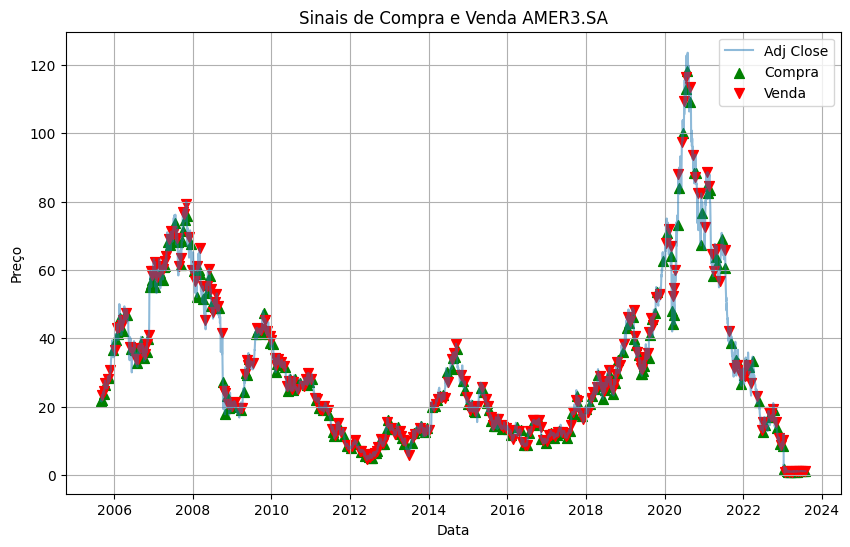

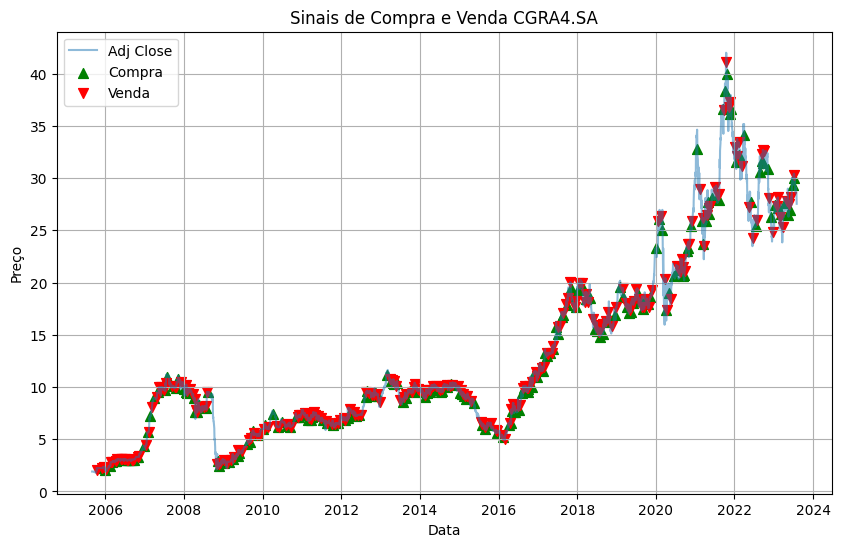

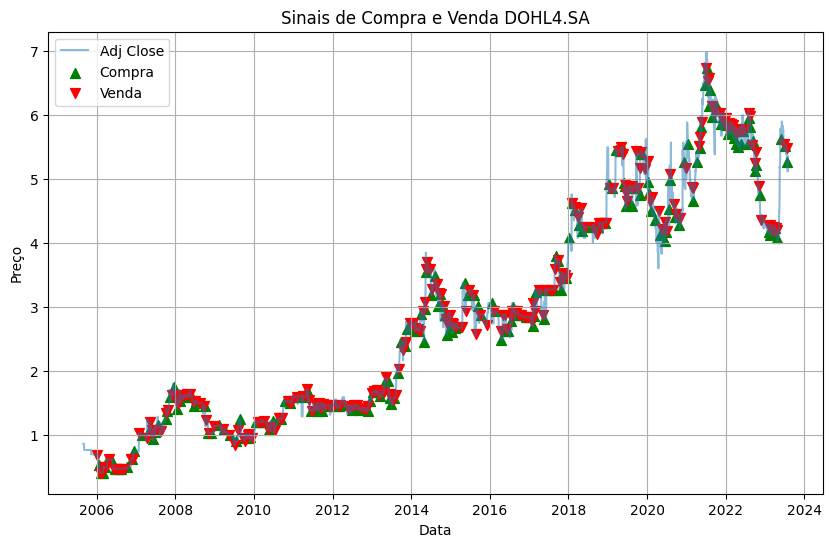

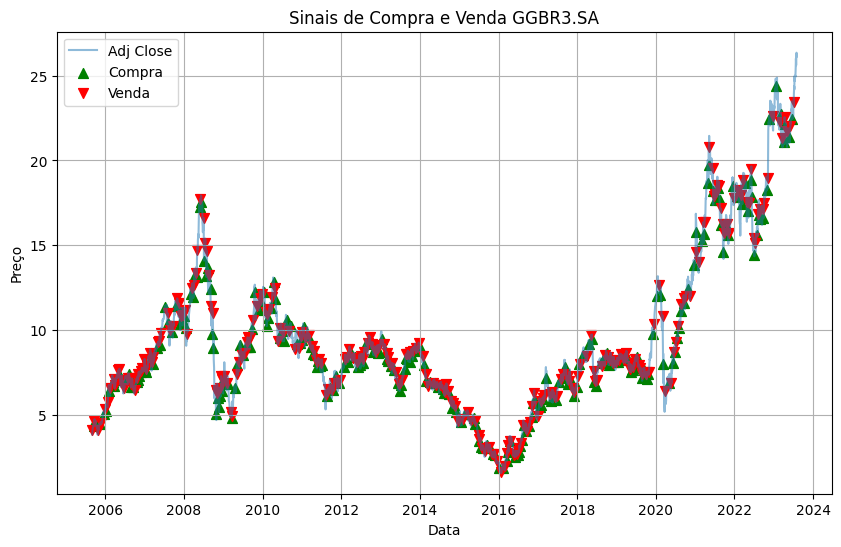

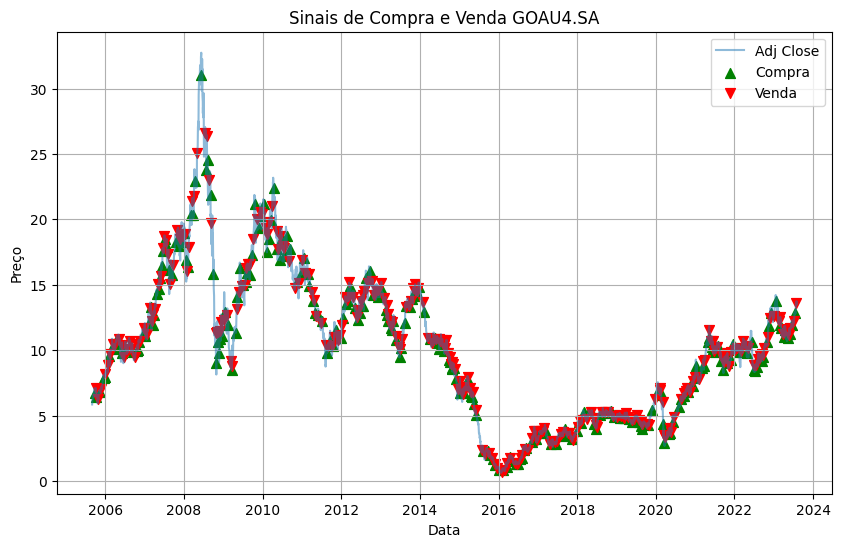

In [621]:
for coluna in df_closes.columns[0:5]:
    plt.figure(figsize=(10, 6))
    plt.plot(df_closes["data"], df_closes[f'{coluna}'], label='Adj Close', alpha=0.5)

# Adicionar pontos de compra e venda ao gráfico
    compra_indices = df_closes[df_closes[f'sinal{coluna}'] == 1].index
    venda_indices = df_closes[df_closes[f'sinal{coluna}'] == 2].index

    plt.scatter(df_closes["data"].loc[compra_indices], df_closes[f'{coluna}'].loc[compra_indices], color='green', label='Compra', marker='^', s=50)
    plt.scatter(df_closes["data"].loc[venda_indices], df_closes[f'{coluna}'].loc[venda_indices], color='red', label='Venda', marker='v', s=50)

# Adicionar legenda e rótulos dos eixos
    plt.legend()
    plt.xlabel('Data')
    plt.ylabel('Preço')
    plt.title(f'Sinais de Compra e Venda {coluna}')
    plt.grid()

# Exibir o gráfico
    plt.show()

In [715]:
df_closes["sinalAMER3.SA"].value_counts()
compraamer3 = np.array(df_closes[df_closes["sinalAMER3.SA"] == 1]["AMER3.SA"])
vendaamer3 = np.array(df_closes[df_closes["sinalAMER3.SA"] == 2]["AMER3.SA"])


In [624]:
df_closes[df_closes["sinalAMER3.SA"] == 1]["AMER3.SA"].index


DatetimeIndex(['2005-08-30', '2005-09-14', '2005-09-29', '2005-10-10',
               '2005-11-10', '2005-12-16', '2006-01-19', '2006-02-03',
               '2006-02-22', '2006-03-21',
               ...
               '2023-02-08', '2023-02-24', '2023-03-14', '2023-03-24',
               '2023-04-26', '2023-05-17', '2023-05-25', '2023-06-19',
               '2023-07-06', '2023-07-31'],
              dtype='datetime64[ns]', name='Date', length=269, freq=None)

In [625]:
df_closes[df_closes["sinalAMER3.SA"] == 2]["AMER3.SA"].index


DatetimeIndex(['2005-09-09', '2005-09-26', '2005-10-04', '2005-11-01',
               '2005-11-25', '2006-01-10', '2006-01-27', '2006-02-10',
               '2006-03-13', '2006-03-24',
               ...
               '2023-01-26', '2023-02-14', '2023-03-06', '2023-03-20',
               '2023-04-03', '2023-05-05', '2023-05-22', '2023-06-14',
               '2023-07-03', '2023-07-25'],
              dtype='datetime64[ns]', name='Date', length=268, freq=None)

In [544]:
compraamer3 = compraamer3[1:]


In [716]:
retorno_estrategia_rsi_amer3 = vendaamer3/compraamer3[:-1]
retorno_estrategia_rsi_acumulado_amer3 = retorno_estrategia_rsi_amer3.cumprod()
print(retorno_estrategia_rsi_acumulado_amer3)

[ 1.07843142  1.21454405  1.37503739  1.45931405  1.58703145  1.58666233
  1.72997402  1.81023074  1.72642395  1.85544365  1.88417053  1.50356779
  1.50356779  1.39931857  1.45988882  1.53024509  1.44412738  1.49395
  1.5934285   1.64482943  1.79063864  1.86897925  1.95238607  2.06407207
  2.18050697  2.2372253   2.38504491  2.50926224  2.58306396  2.70842395
  2.73550823  2.89533939  2.96213866  2.7806437   2.49562802  2.57779855
  2.88886816  3.08546777  3.28339042  3.01753894  2.68493014  2.55643706
  3.00855888  3.32477625  3.11418288  2.74857083  2.84151133  3.07888686
  2.86580271  2.76382423  2.84596057  3.08811703  3.06264782  2.60593711
  2.33051255  3.12221801  2.82047687  3.01840516  3.01840516  3.07533272
  3.0150325   3.107803    3.77329005  4.26707305  4.69252907  4.5074844
  4.70186936  4.75925615  4.90848037  4.70767846  4.7048023   4.65470933
  4.76274083  4.26145617  4.56305556  4.73406521  4.74182047  4.67208818
  3.83187611  4.2747894   3.80344982  4.15474054  3.730

In [717]:
indamer3 = df_closes[df_closes["sinalAMER3.SA"] == 2]["AMER3.SA"].index
retorno_estrategia_rsi_acumulado_amer3 = pd.DataFrame(retorno_estrategia_rsi_acumulado_amer3)
retorno_estrategia_rsi_acumulado_amer3.index = indamer3

In [718]:
df_closes["sinalCGRA4.SA"].value_counts()
compracgra4 = np.array(df_closes[df_closes["sinalCGRA4.SA"] == 1]["CGRA4.SA"])
vendacgra4 = np.array(df_closes[df_closes["sinalCGRA4.SA"] == 2]["CGRA4.SA"])


In [630]:
df_closes[df_closes["sinalCGRA4.SA"] == 1]["CGRA4.SA"].index

DatetimeIndex(['2005-11-18', '2005-12-15', '2005-12-28', '2006-02-15',
               '2006-03-02', '2006-03-28', '2006-04-13', '2006-05-03',
               '2006-05-30', '2006-06-13',
               ...
               '2022-12-05', '2023-01-16', '2023-02-03', '2023-02-13',
               '2023-03-14', '2023-04-18', '2023-05-17', '2023-05-31',
               '2023-06-28', '2023-07-12'],
              dtype='datetime64[ns]', name='Date', length=235, freq=None)

In [631]:
df_closes[df_closes["sinalCGRA4.SA"] == 2]["CGRA4.SA"].index

DatetimeIndex(['2005-10-10', '2005-12-02', '2005-12-22', '2006-01-04',
               '2006-02-21', '2006-03-07', '2006-04-05', '2006-04-20',
               '2006-05-24', '2006-06-07',
               ...
               '2022-11-22', '2022-12-21', '2023-01-27', '2023-02-08',
               '2023-03-03', '2023-03-24', '2023-05-08', '2023-05-23',
               '2023-06-12', '2023-07-04'],
              dtype='datetime64[ns]', name='Date', length=235, freq=None)

In [719]:
retorno_estrategia_rsi_cgra4 = (vendacgra4[1:]/compracgra4[:-1])
retorno_estrategia_rsi_acumulado_cgra4 = retorno_estrategia_rsi_cgra4.cumprod()
len(retorno_estrategia_rsi_acumulado_cgra4)

234

In [720]:
indcgra4 = df_closes[df_closes["sinalCGRA4.SA"] == 2]["CGRA4.SA"].index
retorno_estrategia_rsi_acumulado_cgra4 = pd.DataFrame(retorno_estrategia_rsi_acumulado_cgra4)
retorno_estrategia_rsi_acumulado_cgra4.index = indcgra4[1:]

In [721]:
df_closes["sinalDOHL4.SA"].value_counts()
compradohl4 = np.array(df_closes[df_closes["sinalDOHL4.SA"] == 1]["DOHL4.SA"])
vendadohl4 = np.array(df_closes[df_closes["sinalDOHL4.SA"] == 2]["DOHL4.SA"])


In [722]:
retorno_estrategia_rsi_dohl4 = vendadohl4[1:]/compradohl4[:-1]
retorno_estrategia_rsi_acumulado_dohl4 = retorno_estrategia_rsi_dohl4.cumprod()
len(retorno_estrategia_rsi_acumulado_dohl4)

227

In [723]:
inddohl4 = df_closes[df_closes["sinalDOHL4.SA"] == 2]["DOHL4.SA"].index
retorno_estrategia_rsi_acumulado_dohl4 = pd.DataFrame(retorno_estrategia_rsi_acumulado_dohl4)
retorno_estrategia_rsi_acumulado_dohl4.index = inddohl4[1:]

In [724]:
df_closes["sinalGGBR3.SA"].value_counts()
compraggbr3 = np.array(df_closes[df_closes["sinalGGBR3.SA"] == 1]["GGBR3.SA"])
vendaggbr3 = np.array(df_closes[df_closes["sinalGGBR3.SA"] == 2]["GGBR3.SA"])


In [739]:
df_closes[df_closes["sinalGGBR3.SA"] == 1]["GGBR3.SA"].index

DatetimeIndex(['2005-09-14', '2005-09-26', '2005-11-14', '2005-12-15',
               '2006-01-02', '2006-02-06', '2006-03-09', '2006-03-21',
               '2006-04-24', '2006-05-05',
               ...
               '2022-08-30', '2022-09-27', '2022-10-28', '2022-11-22',
               '2023-01-25', '2023-03-08', '2023-04-06', '2023-04-18',
               '2023-05-25', '2023-06-22'],
              dtype='datetime64[ns]', name='Date', length=264, freq=None)

In [740]:
df_closes[df_closes["sinalGGBR3.SA"] == 2]["GGBR3.SA"].index

DatetimeIndex(['2005-09-02', '2005-09-19', '2005-10-25', '2005-11-17',
               '2005-12-27', '2006-01-23', '2006-02-16', '2006-03-17',
               '2006-04-03', '2006-05-02',
               ...
               '2022-09-21', '2022-10-03', '2022-11-08', '2022-12-29',
               '2023-02-28', '2023-03-22', '2023-04-11', '2023-05-03',
               '2023-06-05', '2023-07-05'],
              dtype='datetime64[ns]', name='Date', length=265, freq=None)

In [726]:
vendaggbr3 = vendaggbr3[1:]

In [751]:
retorno_estrategia_rsi_ggbr3 = (vendaggbr3/compraggbr3)
retorno_estrategia_rsi_acumulado_ggbr3 = retorno_estrategia_rsi_ggbr3.cumprod()
len(retorno_estrategia_rsi_acumulado_ggbr3)

264

In [747]:
indggbr3 = df_closes[df_closes["sinalGGBR3.SA"] == 2]["GGBR3.SA"].index
retorno_estrategia_rsi_acumulado_ggbr3 = pd.DataFrame(retorno_estrategia_rsi_acumulado_ggbr3)
# retorno_estrategia_rsi_acumulado_ggbr3 = retorno_estrategia_rsi_acumulado_ggbr3.apply(np.exp)
retorno_estrategia_rsi_acumulado_ggbr3.index = indggbr3[1:]

In [729]:
df_closes["sinalGOAU4.SA"].value_counts()
compragoau4 = np.array(df_closes[df_closes["sinalGOAU4.SA"] == 1]["GOAU4.SA"])
vendagoau4 = np.array(df_closes[df_closes["sinalGOAU4.SA"] == 2]["GOAU4.SA"])


In [572]:
df_closes[df_closes["sinalGOAU4.SA"] == 1]["GOAU4.SA"].index

DatetimeIndex(['2005-10-06', '2005-11-16', '2005-12-19', '2006-02-06',
               '2006-03-08', '2006-03-30', '2006-04-21', '2006-05-16',
               '2006-06-08', '2006-07-10',
               ...
               '2022-09-27', '2022-10-27', '2022-12-05', '2023-01-25',
               '2023-03-09', '2023-04-06', '2023-04-20', '2023-05-16',
               '2023-06-22', '2023-07-21'],
              dtype='datetime64[ns]', name='Date', length=211, freq=None)

In [574]:
df_closes[df_closes["sinalGOAU4.SA"] == 2]["GOAU4.SA"].index

DatetimeIndex(['2005-10-25', '2005-11-21', '2005-12-23', '2006-02-17',
               '2006-03-17', '2006-04-05', '2006-05-11', '2006-05-30',
               '2006-06-22', '2006-07-27',
               ...
               '2022-10-04', '2022-11-08', '2023-01-06', '2023-03-01',
               '2023-03-24', '2023-04-13', '2023-05-09', '2023-05-19',
               '2023-07-05', '2023-07-26'],
              dtype='datetime64[ns]', name='Date', length=211, freq=None)

In [730]:
retorno_estrategia_rsi_goau4 = vendagoau4/compragoau4
retorno_estrategia_rsi_acumulado_goau4 = retorno_estrategia_rsi_goau4.cumprod()
len(retorno_estrategia_rsi_acumulado_goau4)

270

In [731]:
indgoau4 = df_closes[df_closes["sinalGOAU4.SA"] == 2]["GOAU4.SA"].index
retorno_estrategia_rsi_acumulado_goau4 = pd.DataFrame(retorno_estrategia_rsi_acumulado_goau4)
retorno_estrategia_rsi_acumulado_goau4.index = indgoau4

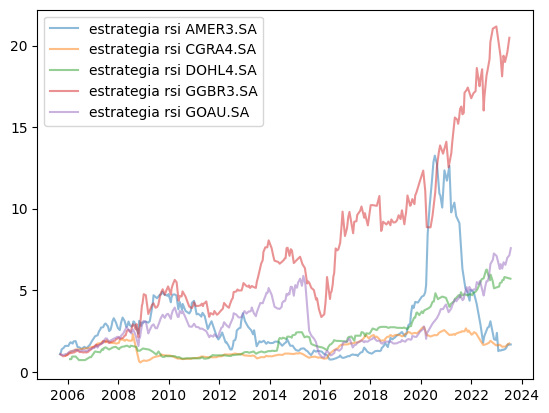

In [732]:
plt.plot(indamer3, retorno_estrategia_rsi_acumulado_amer3, alpha=0.5,label="estrategia rsi AMER3.SA")
plt.plot(indcgra4[1:], retorno_estrategia_rsi_acumulado_cgra4, alpha=0.5,label="estrategia rsi CGRA4.SA")
plt.plot(inddohl4[1:] ,retorno_estrategia_rsi_acumulado_dohl4, alpha=0.5,label="estrategia rsi DOHL4.SA")
plt.plot(indggbr3[1:], retorno_estrategia_rsi_acumulado_ggbr3, alpha=0.5, label="estrategia rsi GGBR3.SA")
plt.plot(indgoau4, retorno_estrategia_rsi_acumulado_goau4, alpha=0.5, label="estrategia rsi GOAU.SA")


plt.legend()



In [561]:
df_closes["AMER3.SA"].pct_change().cumprod()

Date
2005-08-30             NaN
2005-08-31    7.843045e-03
2005-09-01   -2.746618e-05
2005-09-02    1.072142e-08
2005-09-05   -1.256415e-10
                  ...     
2023-07-27   -0.000000e+00
2023-07-28   -0.000000e+00
2023-07-31   -0.000000e+00
2023-08-01   -0.000000e+00
2023-08-02    0.000000e+00
Name: AMER3.SA, Length: 4456, dtype: float64

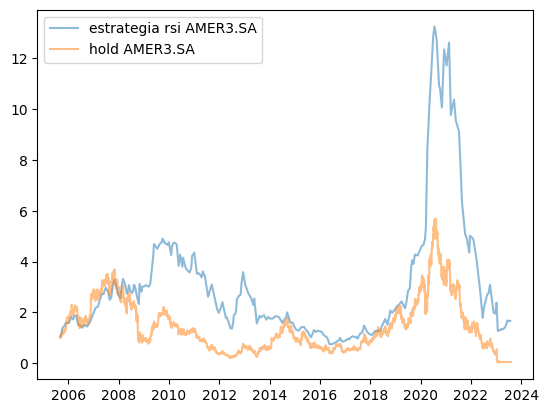

In [733]:
plt.plot(indamer3, retorno_estrategia_rsi_acumulado_amer3, alpha=0.5,label="estrategia rsi AMER3.SA")
plt.plot(df_closes.index, (df_closes["AMER3.SA"].pct_change()+1).cumprod() , alpha=0.5,label="hold AMER3.SA")
plt.legend()

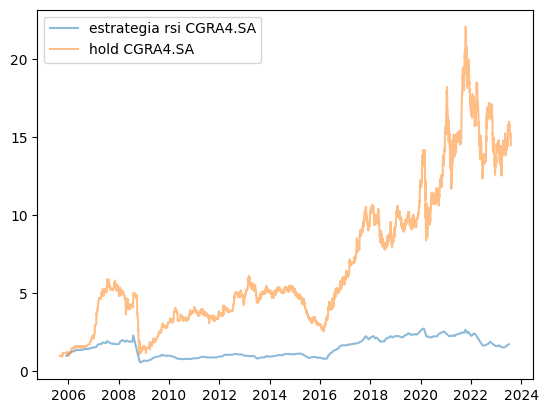

In [734]:
plt.plot(indcgra4[1:], retorno_estrategia_rsi_acumulado_cgra4, alpha=0.5,label="estrategia rsi CGRA4.SA")
plt.plot(df_closes.index, (df_closes["CGRA4.SA"].pct_change()+1).cumprod() , alpha=0.5,label="hold CGRA4.SA")
plt.legend()

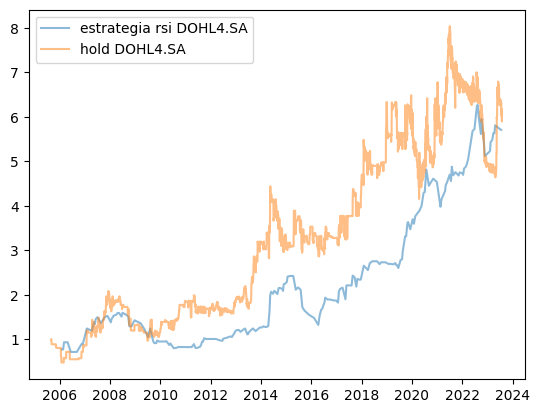

In [735]:
plt.plot(inddohl4[1:] ,retorno_estrategia_rsi_acumulado_dohl4, alpha=0.5,label="estrategia rsi DOHL4.SA")
plt.plot(df_closes.index, (df_closes["DOHL4.SA"].pct_change()+1).cumprod() , alpha=0.5,label="hold DOHL4.SA")
plt.legend()

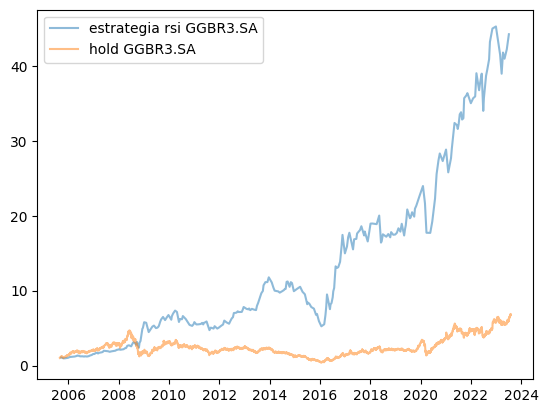

In [748]:
plt.plot(indggbr3[1:] ,retorno_estrategia_rsi_acumulado_ggbr3, alpha=0.5,label="estrategia rsi GGBR3.SA")
plt.plot(df_closes.index, (df_closes["GGBR3.SA"].pct_change()+1).cumprod() , alpha=0.5,label="hold GGBR3.SA")
plt.legend()

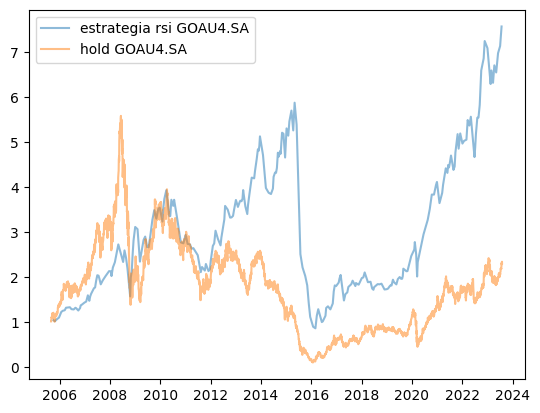

In [737]:
plt.plot(indgoau4 ,retorno_estrategia_rsi_acumulado_goau4, alpha=0.5,label="estrategia rsi GOAU4.SA")
plt.plot(df_closes.index, (df_closes["GOAU4.SA"].pct_change()+1).cumprod() , alpha=0.5,label="hold GOAU4.SA")
plt.legend()

In [206]:
ibov = pd.DataFrame(ibov)

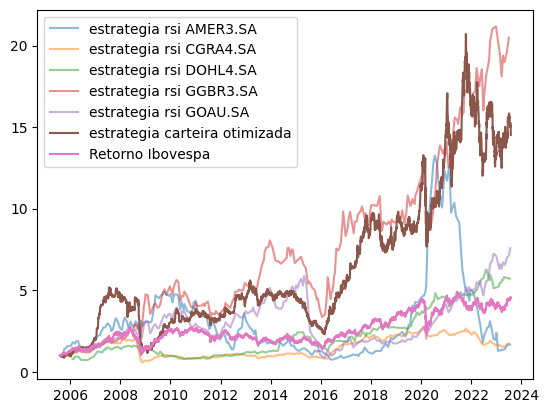

In [738]:
plt.plot(indamer3, retorno_estrategia_rsi_acumulado_amer3, alpha=0.5,label="estrategia rsi AMER3.SA")
plt.plot(indcgra4[1:], retorno_estrategia_rsi_acumulado_cgra4, alpha=0.5,label="estrategia rsi CGRA4.SA")
plt.plot(inddohl4[1:] ,retorno_estrategia_rsi_acumulado_dohl4, alpha=0.5,label="estrategia rsi DOHL4.SA")
plt.plot(indggbr3[1:], retorno_estrategia_rsi_acumulado_ggbr3, alpha=0.5, label="estrategia rsi GGBR3.SA")
plt.plot(indgoau4, retorno_estrategia_rsi_acumulado_goau4, alpha=0.5, label="estrategia rsi GOAU.SA")
plt.plot(retorno_acumulado_otimizado.index, retorno_acumulado_otimizado , label="estrategia carteira otimizada")
plt.plot(ibov["data"],(ibov["Adj Close"].pct_change()+1).cumprod(), label="Retorno Ibovespa")


plt.legend()


MODELAGEM MACHINE LEARNING

In [4]:
df_ml = pd.read_csv("df_balanco_patrimonial_WEG.csv")

In [5]:
df_ml = df_ml.set_index(df_ml["index"], inplace=False)

In [12]:
df_ml["Close"] = df_ml["Close"].shift(1).fillna(0)

In [13]:
df_ml = df_ml.drop(columns=["index","MES ANO"])

In [14]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2005-09-30 to 2023-06-30
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    Ativo total               72 non-null     int64  
 1    Ativo Circulante          72 non-null     int64  
 2    Ativo nao circulante      72 non-null     int64  
 3    Realizavel LP             72 non-null     int64  
 4    Inv em subsid e outros    72 non-null     int64  
 5    Imobilizado               72 non-null     int64  
 6    Passivo e patrimonio liq  72 non-null     int64  
 7    Passivo Circulante        72 non-null     int64  
 8    Dividendos a Pagar CP     72 non-null     int64  
 9    Passivo nao circulante    72 non-null     int64  
 10   Patrim liq consolidado    72 non-null     int64  
 11   Patrimonio liquido        72 non-null     int64  
 12   Capital social            72 non-null     int64  
 13  Close                      72 non-null  

Teste Regressão Linear:

In [15]:
from sklearn.model_selection import train_test_split

Y = df_ml["Close"]
X = df_ml.loc[:, (df_ml.columns != "Close")&(df_ml.columns != "sinal")]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)



In [16]:
X

,Ativo total,Ativo Circulante,Ativo nao circulante,Realizavel LP,Inv em subsid e outros,Imobilizado,Passivo e patrimonio liq,Passivo Circulante,Dividendos a Pagar CP,Passivo nao circulante,Patrim liq consolidado,Patrimonio liquido,Capital social
index,,,,,,,,,,,,,
2005-09-30,1378913,137448,1241465,12324,1227389,1752,1378913,9303,7764,14058,1355552,1355552,1000000
2005-12-31,1497784,138298,1359486,92252,1265516,1718,1497784,89315,87539,37006,1371463,1371463,1000000
2006-03-31,1532448,59511,1472937,97530,1373725,1682,1532448,10288,8406,41745,1480415,1480415,1000000
2006-06-30,1558863,187794,1371069,16599,1352825,1645,1558863,100867,99909,43657,1414339,1414339,907000
2006-09-30,1561822,70807,1491015,21251,1468157,1607,1561822,18471,16594,14899,1528452,1528452,907000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,13870269,1326805,12543464,10467,12528985,4002,13870269,451595,401429,4730,13413944,13413944,6504517
2022-09-30,14115374,1166398,12948976,10685,12934301,3980,14115374,216193,165771,4730,13894451,13894451,6504517
2022-12-31,15228161,1360284,13867877,11728,13852181,3958,15228161,388636,360331,4730,14834795,14834795,6504517


In [17]:
from sklearn.linear_model import LinearRegression


In [18]:


lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [19]:
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [-0.04530651  0.96005087  2.12710999  1.83461796  1.52845411]
Labels: [0.0, 1.1094670295715332, 1.1575440168380735, 1.2056210041046145, 1.1834310293197632]


In [20]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.6415900822513192

Teste Arvore de Decisão:

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Cross Validation modelo de Arvore de Decisão e Regressão Linear

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.48339394 8.97643534 2.56756236 0.91290526 1.92563454 3.4547197
 0.40737892 0.4167925  0.37272822 3.17595382]
Mean: 2.2693504602478507
Standard deviation: 2.5088793850090747


In [24]:
scores = cross_val_score(lin_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [1.68399858 3.11808495 1.12473025 2.00656445 2.18303877 3.20833551
 1.53661349 0.832839   2.32855445 2.00868567]
Mean: 2.003144512288909
Standard deviation: 0.7276403941774834


Teste Floresta Aleatória:

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [26]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.8601372055728111

In [27]:
scores = cross_val_score(rf_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [0.319845   7.33406697 1.53700405 0.80118998 1.52501733 1.6252067
 0.28796172 0.34596442 0.65176704 2.18343889]
Mean: 1.66114621090438
Standard deviation: 1.9915534722839843


Grid Search no modelo Florestas Aleatorias:

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 3}

In [31]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=3)

Teste dados de teste

In [32]:
preds_lin_test = lin_reg.predict(x_test)
lin_mse_test = mean_squared_error(y_test, preds_lin_test)

lin_rmse_test = np.sqrt(lin_mse_test)
lin_rmse_test

4.103533011881554

In [33]:
preds_tree_reg_test = tree_reg.predict(x_test)
tree_mse_test = mean_squared_error(y_test, preds_tree_reg_test)

tree_rmse_test = np.sqrt(tree_mse_test)
tree_rmse_test

3.747406526824048

In [34]:
preds_rf_reg_test = rf_reg.predict(x_test)
rf_mse_test = mean_squared_error(y_test, preds_rf_reg_test)

rf_rmse_test = np.sqrt(rf_mse_test)
rf_rmse_test

3.011068961677879

In [605]:
print(preds_rf_reg_test, y_test)

[ 2.77436507 28.03370029  6.63462803  6.30683922  3.3254618   3.05292493
  2.21175772  1.47552247  1.82609096  2.3587749   2.81981852 10.85175167
  3.50373462  5.84694988  2.28588074  4.66962352  7.16736673 36.44289968
  6.66554177 11.00620831  4.4536812  35.86649895] index
2010-09-30     2.736686
2020-03-31    16.785000
2016-12-31     6.742307
2016-03-31     5.403846
2013-03-31     3.687129
2011-12-31     2.919748
2009-06-30     2.041420
2006-09-30     1.428571
2007-03-31     1.918850
2008-03-31     2.899408
2011-06-30     2.633136
2019-12-31    14.450000
2012-12-31     3.533653
2014-09-30     5.494230
2009-03-31     1.727810
2013-12-31     4.341716
2017-06-30     6.807692
2022-09-30    32.139999
2015-03-31     6.115384
2019-09-30    12.115000
2014-03-31     4.689349
2021-09-30    39.630001
Name: Close, dtype: float64


Continuação estudos de ML, agora com variavel de parametro categorica, subir ou descer:

In [699]:
vetor = list([])
for i in range(len(df_ml)-1):
    if (i == len(df_ml))       :
        vetor.append(0)
    elif (df_ml["Close"].iloc[i+1]  <  df_ml["Close"].iloc[i]):
        vetor.append(0)
    elif (df_ml["Close"].iloc[i+1]  >  df_ml["Close"].iloc[i]): 
        vetor.append(1)
    

In [700]:
df_ml.iloc[-1:].index

Index(['2023-06-30'], dtype='object', name='index')

In [701]:
df_ml =df_ml.drop(index = df_ml.iloc[-1:].index)

In [702]:
df_ml["sinal"] = vetor

In [703]:
df_ml

,Ativo total,Ativo Circulante,Ativo nao circulante,Realizavel LP,Inv em subsid e outros,Imobilizado,Passivo e patrimonio liq,Passivo Circulante,Dividendos a Pagar CP,Passivo nao circulante,Patrim liq consolidado,Patrimonio liquido,Capital social,Close,sinal
index,,,,,,,,,,,,,,,
2005-09-30,1378913,137448,1241465,12324,1227389,1752,1378913,9303,7764,14058,1355552,1355552,1000000,1.109467,1
2005-12-31,1497784,138298,1359486,92252,1265516,1718,1497784,89315,87539,37006,1371463,1371463,1000000,1.157544,1
2006-03-31,1532448,59511,1472937,97530,1373725,1682,1532448,10288,8406,41745,1480415,1480415,1000000,1.205621,0
2006-06-30,1558863,187794,1371069,16599,1352825,1645,1558863,100867,99909,43657,1414339,1414339,907000,1.183431,1
2006-09-30,1561822,70807,1491015,21251,1468157,1607,1561822,18471,16594,14899,1528452,1528452,907000,1.428571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,12605691,1087551,11518140,9335,11504772,4023,12605691,183384,139112,4730,12417577,12417577,5504517,34.869999,0
2022-06-30,13870269,1326805,12543464,10467,12528985,4002,13870269,451595,401429,4730,13413944,13413944,6504517,26.450001,1
2022-09-30,14115374,1166398,12948976,10685,12934301,3980,14115374,216193,165771,4730,13894451,13894451,6504517,32.139999,1


teste Regressão Logistica:

In [709]:
from sklearn.model_selection import train_test_split

Y = df_ml["sinal"]
X = df_ml.loc[:, (df_ml.columns != "sinal")&(df_ml.columns != "sinal")]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)



In [710]:
X

,Ativo total,Ativo Circulante,Ativo nao circulante,Realizavel LP,Inv em subsid e outros,Imobilizado,Passivo e patrimonio liq,Passivo Circulante,Dividendos a Pagar CP,Passivo nao circulante,Patrim liq consolidado,Patrimonio liquido,Capital social,Close
index,,,,,,,,,,,,,,
2005-09-30,1378913,137448,1241465,12324,1227389,1752,1378913,9303,7764,14058,1355552,1355552,1000000,1.109467
2005-12-31,1497784,138298,1359486,92252,1265516,1718,1497784,89315,87539,37006,1371463,1371463,1000000,1.157544
2006-03-31,1532448,59511,1472937,97530,1373725,1682,1532448,10288,8406,41745,1480415,1480415,1000000,1.205621
2006-06-30,1558863,187794,1371069,16599,1352825,1645,1558863,100867,99909,43657,1414339,1414339,907000,1.183431
2006-09-30,1561822,70807,1491015,21251,1468157,1607,1561822,18471,16594,14899,1528452,1528452,907000,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,12605691,1087551,11518140,9335,11504772,4023,12605691,183384,139112,4730,12417577,12417577,5504517,34.869999
2022-06-30,13870269,1326805,12543464,10467,12528985,4002,13870269,451595,401429,4730,13413944,13413944,6504517,26.450001
2022-09-30,14115374,1166398,12948976,10685,12934301,3980,14115374,216193,165771,4730,13894451,13894451,6504517,32.139999


In [711]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [712]:
predictions = logmodel.predict(x_test)


In [713]:
from sklearn.metrics import classification_report

In [714]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.85      0.94      0.89        18

    accuracy                           0.82        22
   macro avg       0.68      0.60      0.61        22
weighted avg       0.79      0.82      0.79        22

